# Survival analysis

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))
library(broom)
library(survival)
suppressPackageStartupMessages(library(survminer))

# Global
options(warn = -1)

# Scripts
source("summarize.R")

# Data
load("DF.Rdata")

glimpse(DF)

Observations: 411
Variables: 23
$ registry_id            <dbl> 20060035601, 19970063502, 20040008703, 2007008…
$ pt_stage               <fct> T1, T1, T2, T1, T1, T1, Tis, T1, T2, Ta, Ta, T…
$ sp_id                  <chr> "06-S-4802", "07-S-3788", "07-S-8931", "07-S-6…
$ ck56                   <dbl> 60, 10, 90, NA, NA, 5, NA, 0, 0, 40, NA, 40, 4…
$ ck20                   <dbl> 0, 0, 0, NA, 0, 70, NA, 80, 0, 0, NA, 0, 10, N…
$ cd44                   <dbl> 70, 60, NA, NA, NA, 40, NA, 5, NA, 60, NA, NA,…
$ gata3                  <dbl> 100, 100, 100, NA, 100, 100, NA, 100, 100, 100…
$ er                     <dbl> 40, 20, NA, NA, 0, 0, 0, 0, 0, 5, NA, NA, 0, N…
$ her2                   <dbl> 0, 5, NA, NA, 60, 30, NA, 40, 60, 60, NA, 30, …
$ uroplakin              <dbl> 5, 20, NA, NA, NA, 0, NA, 10, NA, 0, NA, NA, 0…
$ sex                    <fct> Male, Male, Male, Male, Male, Male, Female, Ma…
$ death                  <fct> Dead, Alive, Dead, Alive, Alive, Alive, Alive,…
$ progression_stage_

In [2]:
# A function to define which statistics (v.g., median, max value) will be used for summarizing biomarkers expression
# If needed, changing this function will update the approach for the entire analysis
summarize_biomarker <- function(x) { mean(x, na.rm = TRUE) }

# Tidying up the data and summarizing expression
OUTCOME <- DF %>% 
    group_by(sp_id) %>% 
    summarize(
        ck56 = summarize_biomarker(ck56),
        cd44 = summarize_biomarker(cd44),
        ck20 = summarize_biomarker(ck20),
        er = summarize_biomarker(er),
        her2 = summarize_biomarker(her2),
        gata3 = summarize_biomarker(gata3),
        pt_stage = unique(pt_stage),
        fu_mo = unique(fu_mo),
        recurrence_next = unique(recurrence_next),
        recurrence_any = unique(recurrence_any),
        progression_grade_next = unique(progression_grade_next),
        progression_grade_any = unique(progression_grade_any),
        progression_stage_next = unique(progression_stage_next),
        progression_stage_any = unique(progression_stage_any)
    ) %>% 
    mutate(
        pt = ifelse(
          pt_stage == "Tis" | pt_stage == "Ta",
          "Low pT stage (<pT1)", "High pT stage (pT1-pT2)"
        ),
        pt = fct_relevel(pt, "Low pT stage (<pT1)"),
        ck56_level = ifelse(
          ck56 > summarize_biomarker(ck56),
          "High CK5/6 expression", "Low CK5/6 expression"
        ),
        ck56_level = fct_relevel(ck56_level, "Low CK5/6 expression"),
        cd44_level = ifelse(
          cd44 > summarize_biomarker(cd44),
          "High CD44 expression", "Low CD44 expression"
        ),
        cd44_level = fct_relevel(cd44_level, "Low CD44 expression"),
        ck20_level = ifelse(
          ck20 > summarize_biomarker(ck20),
          "High CK20 expression", "Low CK20 expression"
        ),
        ck20_level = fct_relevel(ck20_level, "Low CK20 expression"),
        er_level = ifelse(
          er > summarize_biomarker(er),
          "High ER expression", "Low ER expression"
        ),
        er_level = fct_relevel(er_level, "Low CK20 expression"),
        her2_level = ifelse(
          her2 > summarize_biomarker(her2),
          "High HER2 expression", "Low HER2 expression"
        ),
        her2_level = fct_relevel(her2_level, "Low HER2 expression"),
        gata3_level = ifelse(
          gata3 > summarize_biomarker(gata3),
          "High GATA3 expression", "Low GATA3 expression"
        ),
        gata3_level = fct_relevel(gata3_level, "Low GATA3 expression")
    )

glimpse(OUTCOME)

Observations: 128
Variables: 22
$ sp_id                  <chr> "01-S-10015", "01-S-7500", "01-S-9347", "02-S-…
$ ck56                   <dbl> 5.000000, 3.333333, 10.000000, 11.000000, 15.0…
$ cd44                   <dbl> 30.000000, 15.000000, 43.333333, 26.000000, 38…
$ ck20                   <dbl> 10.000000, 23.333333, 30.000000, 25.000000, 76…
$ er                     <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.…
$ her2                   <dbl> 36.666667, 0.000000, 18.333333, 1.666667, 50.0…
$ gata3                  <dbl> 100.00000, 100.00000, 100.00000, 100.00000, 10…
$ pt_stage               <fct> Ta, Ta, Ta, T1, T1, T1, T1, T1, Ta, T1, Ta, Ta…
$ fu_mo                  <dbl> 85.2, 4.5, 85.2, 57.9, 57.9, 31.3, 31.3, 3.9, …
$ recurrence_next        <fct> No tumor recurrence, Tumor recurrence, Tumor r…
$ recurrence_any         <fct> Tumor recurrence, Tumor recurrence, Tumor recu…
$ progression_grade_next <fct> No grade progression, No grade progression, No…
$ progression_grade_

## CK5/6

In [3]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = ck56_level)

### Tumor recurrence at next biopsy

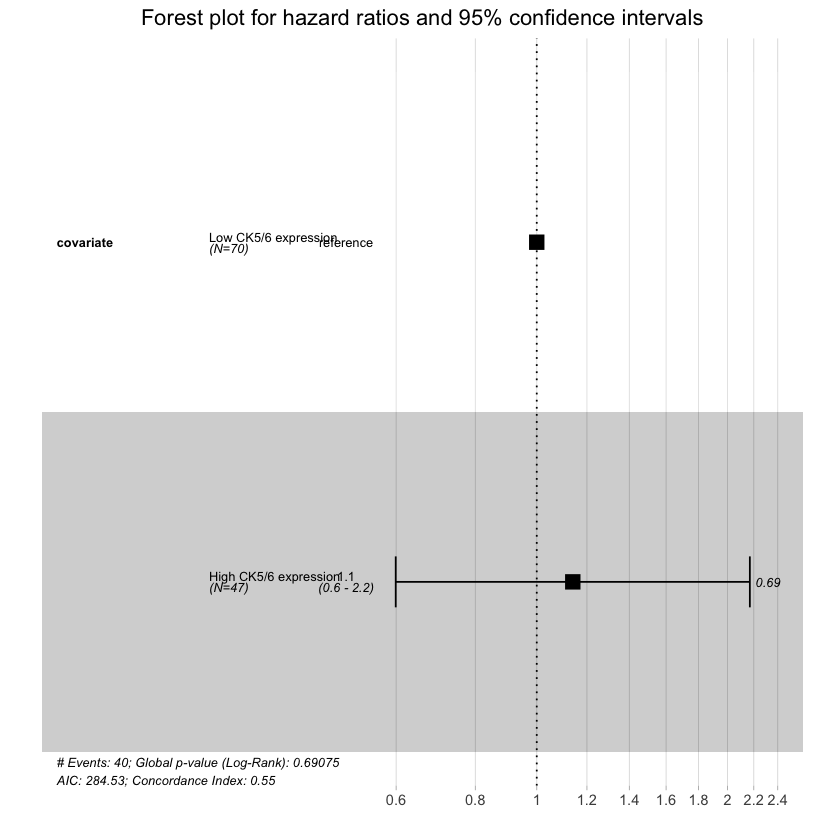

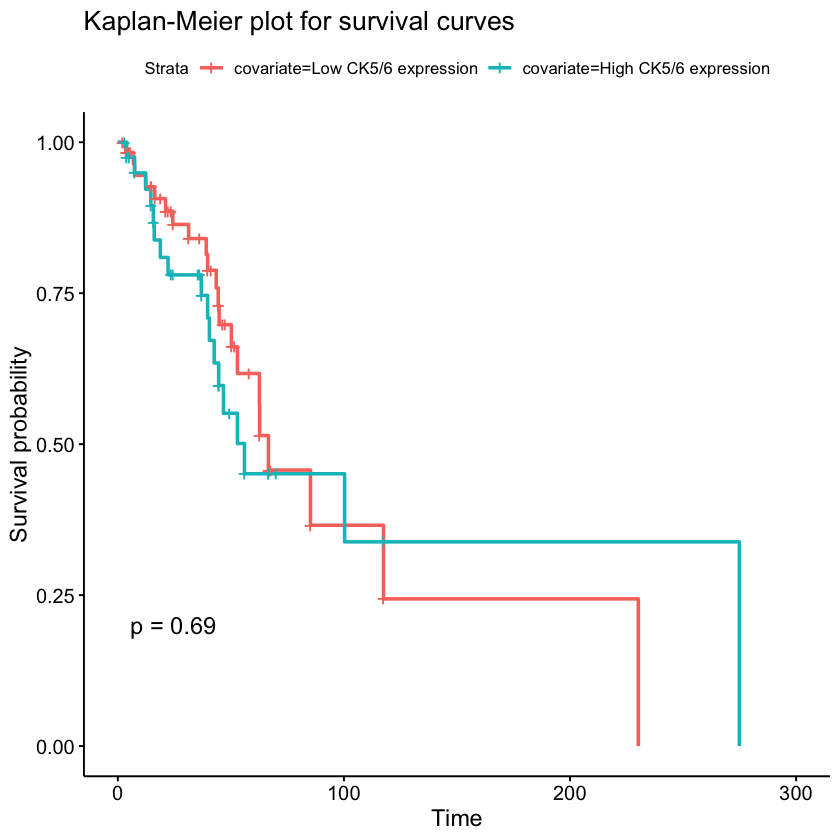

In [4]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

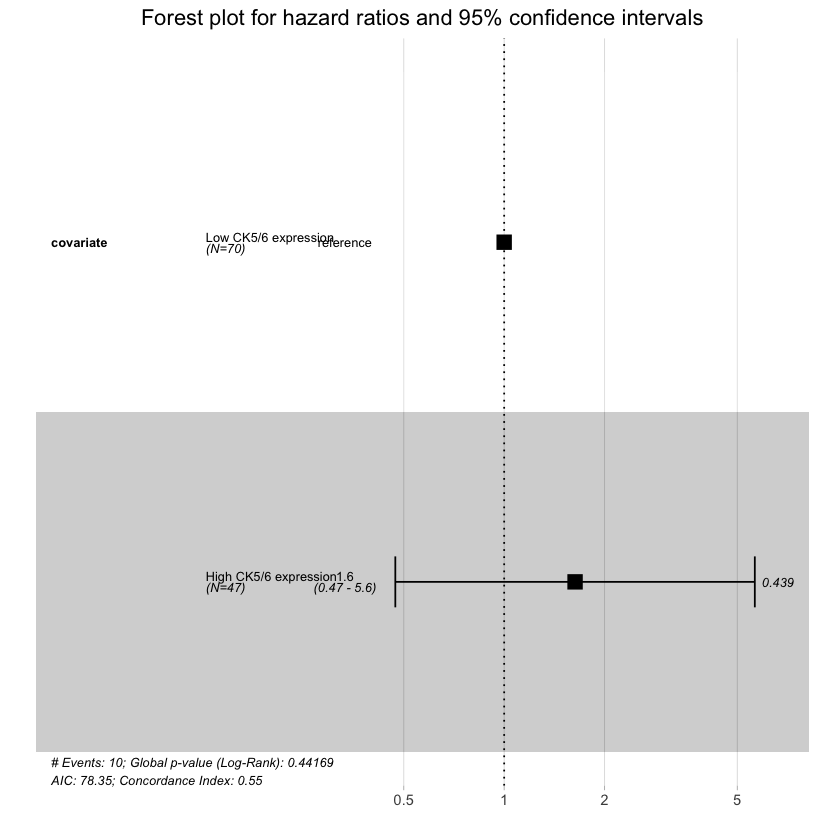

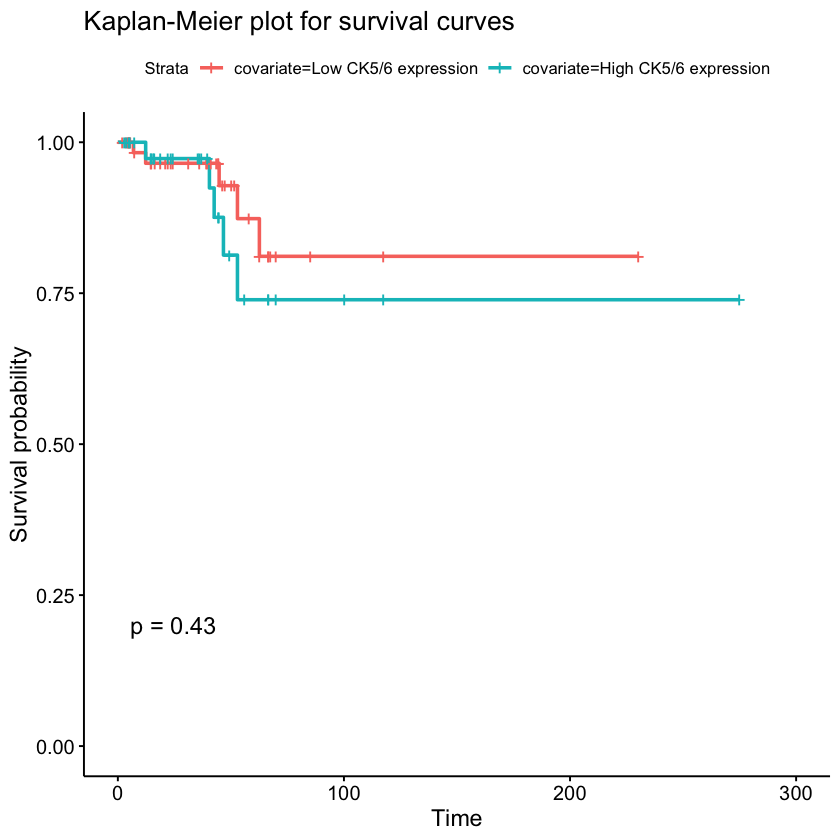

In [5]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

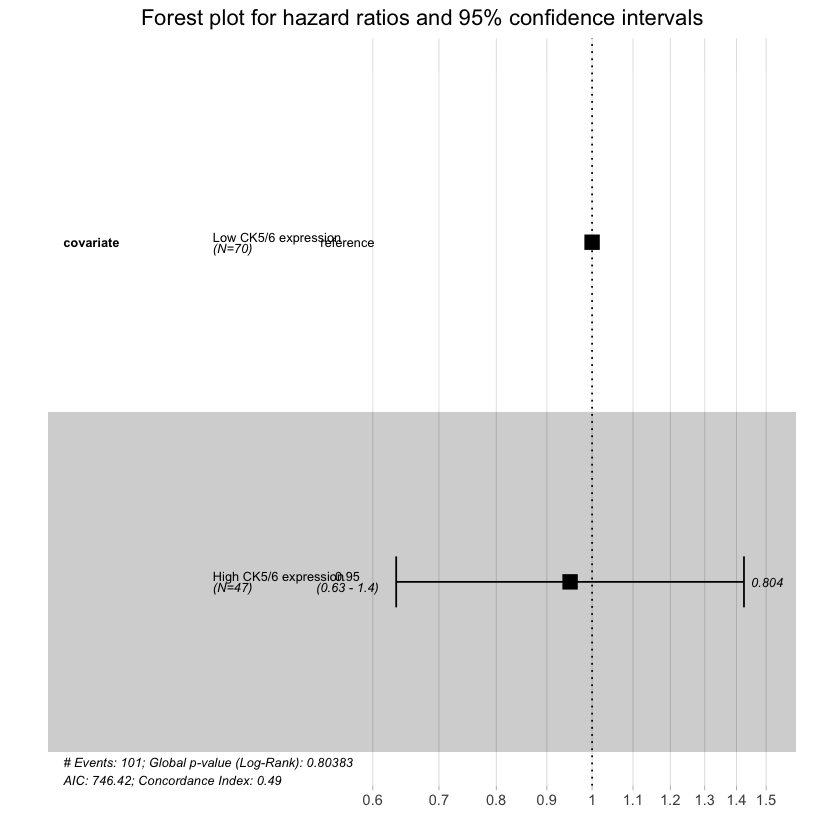

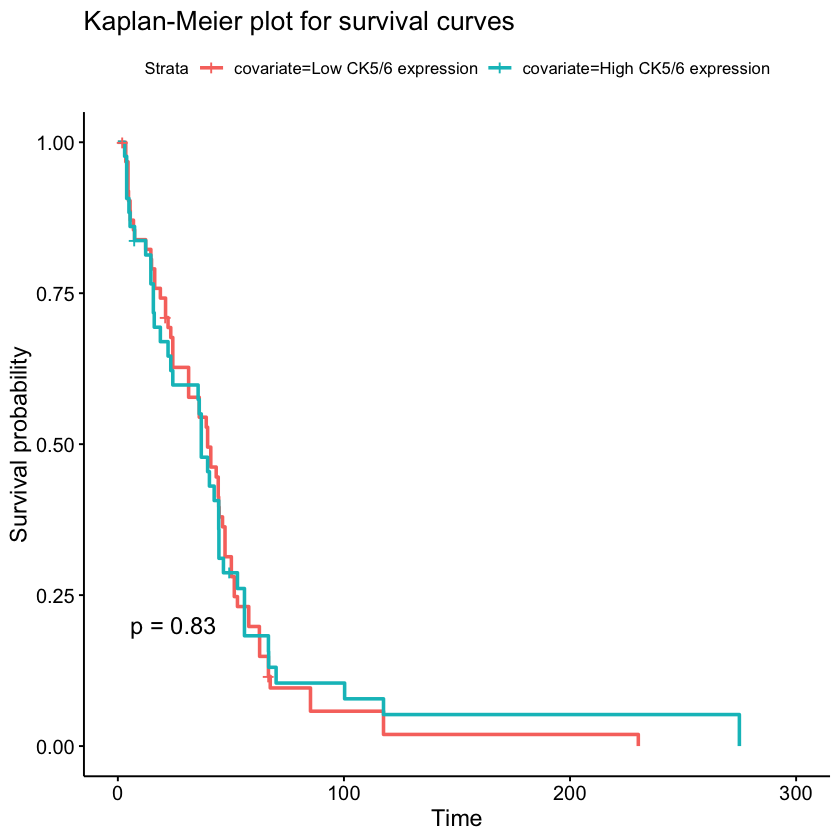

In [6]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

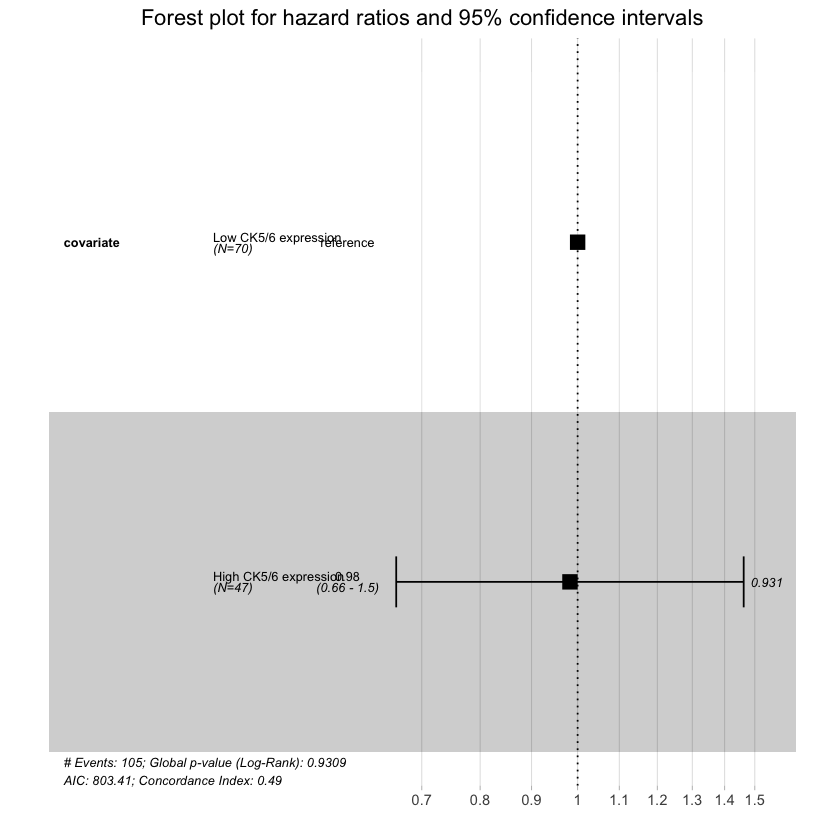

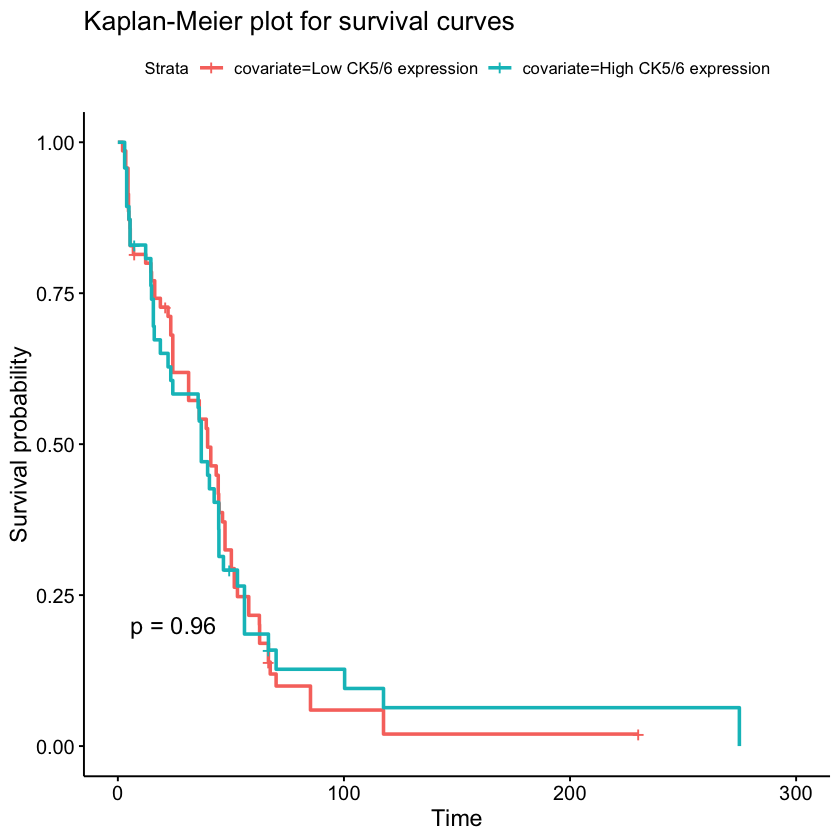

In [7]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

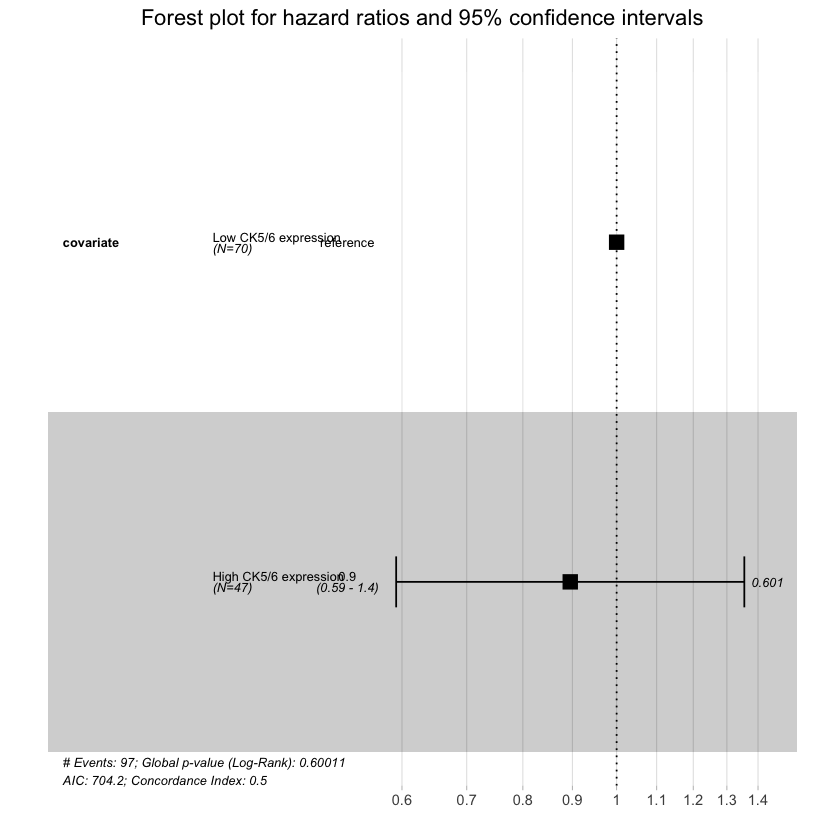

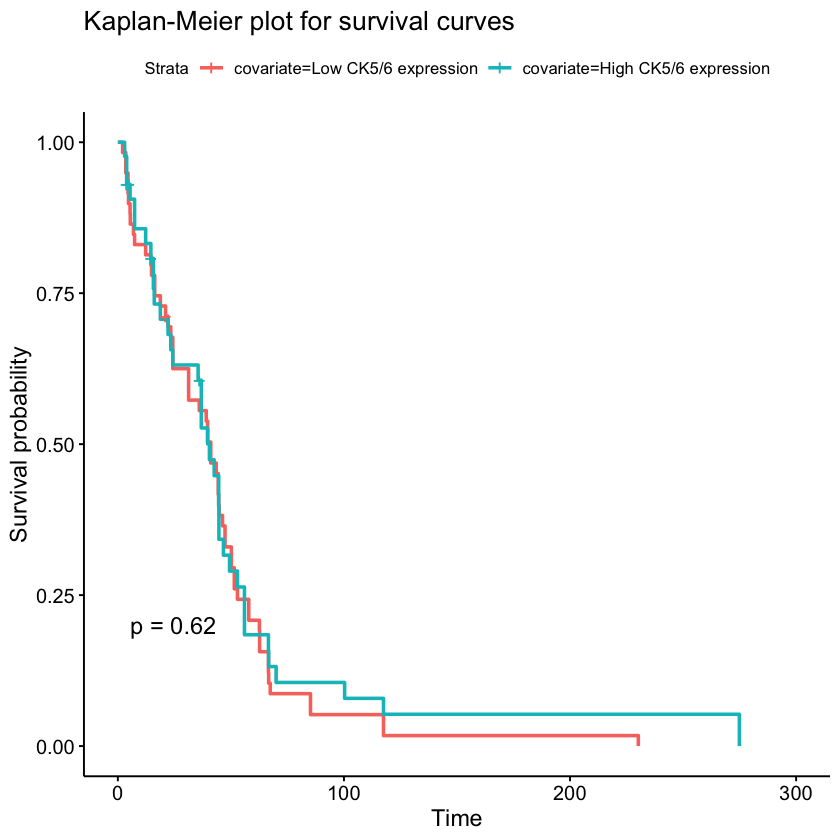

In [8]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

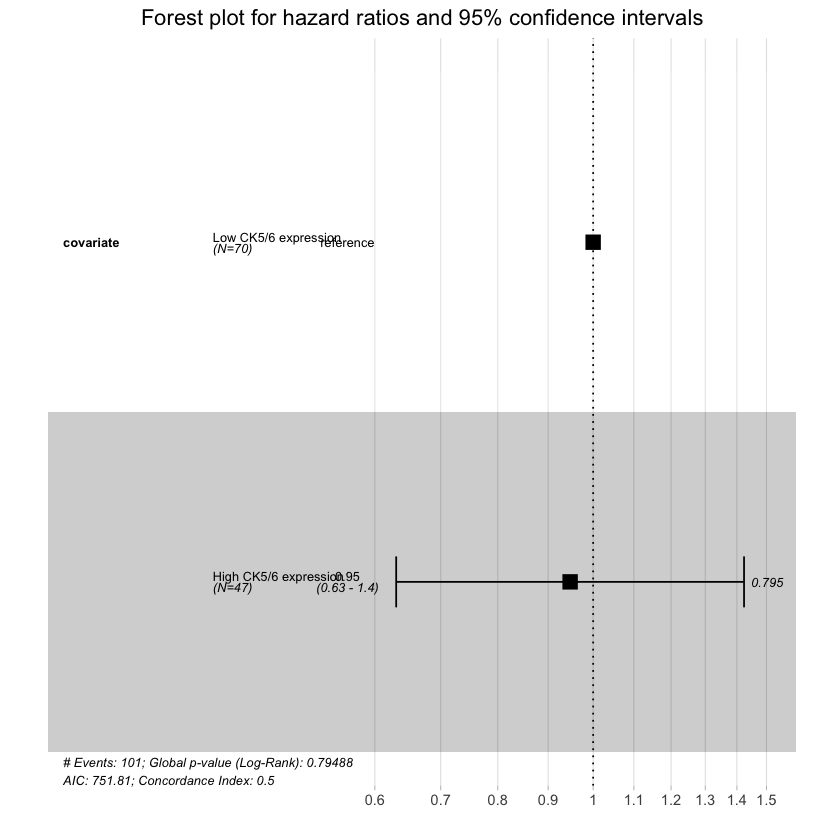

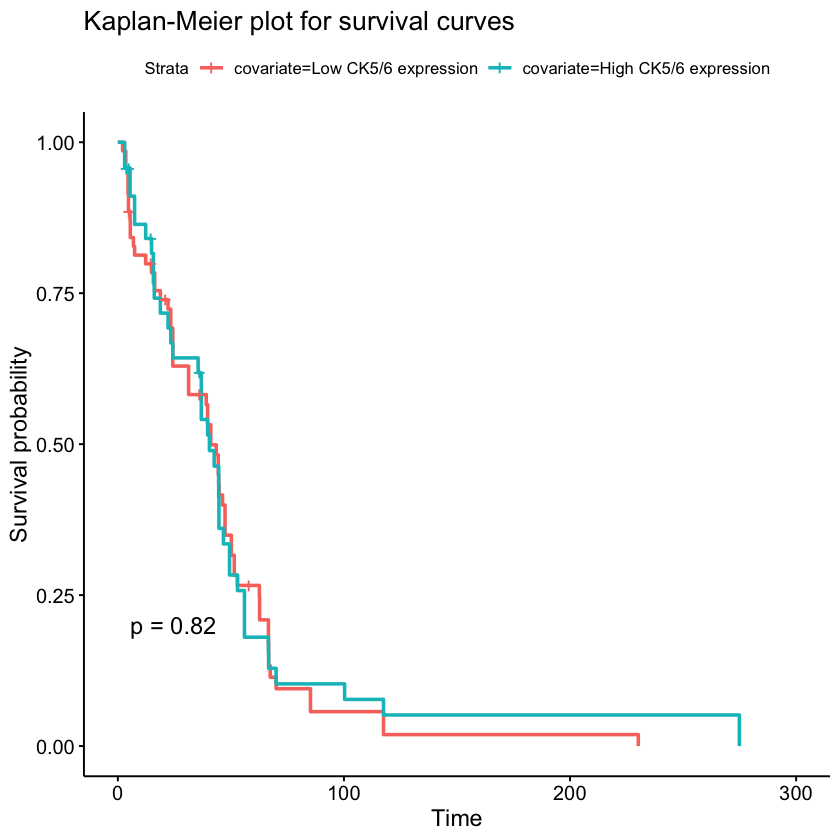

In [9]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)

## CD44

In [10]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = cd44_level)

### Tumor recurrence at next biopsy

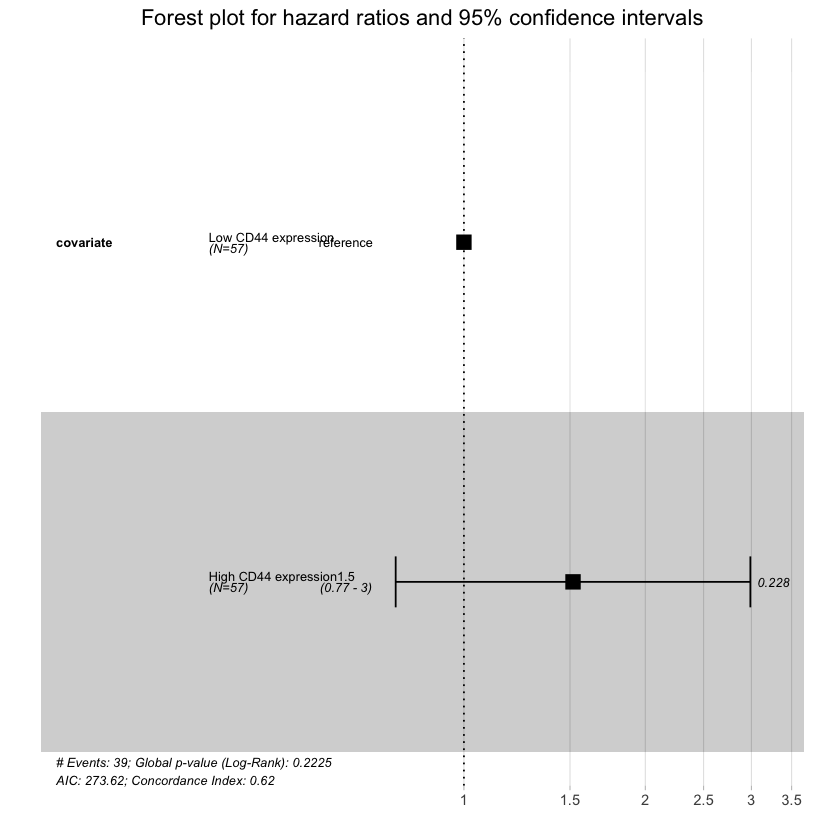

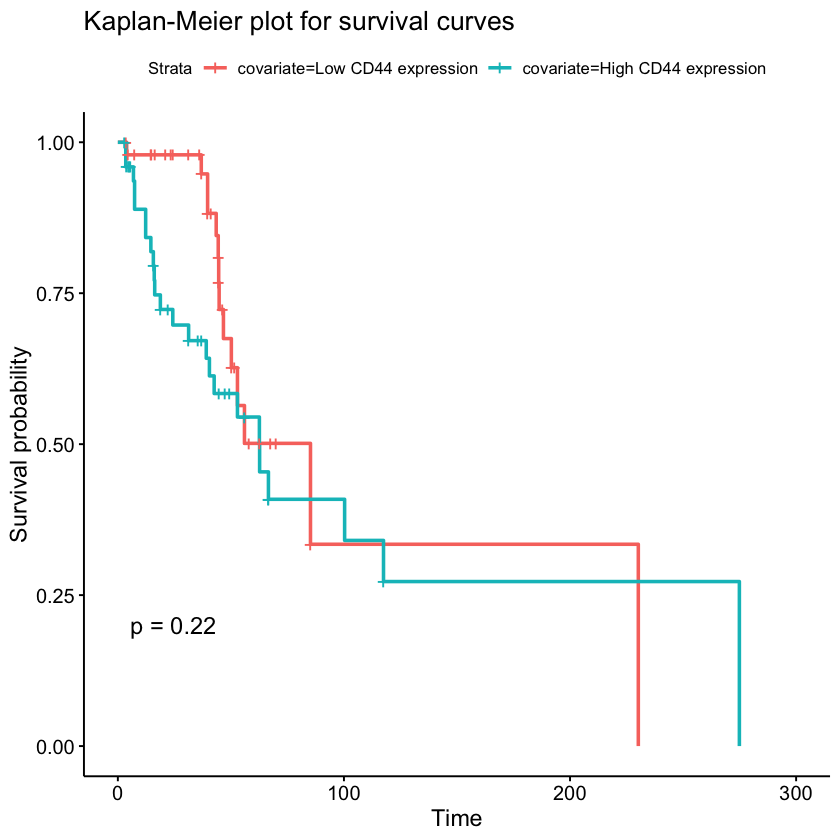

In [11]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

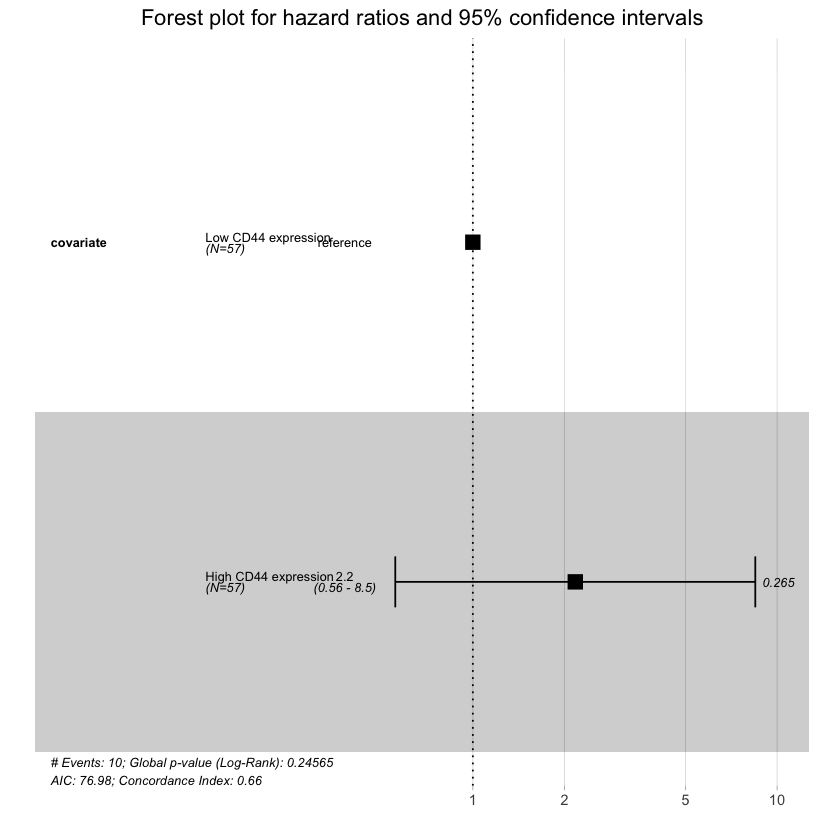

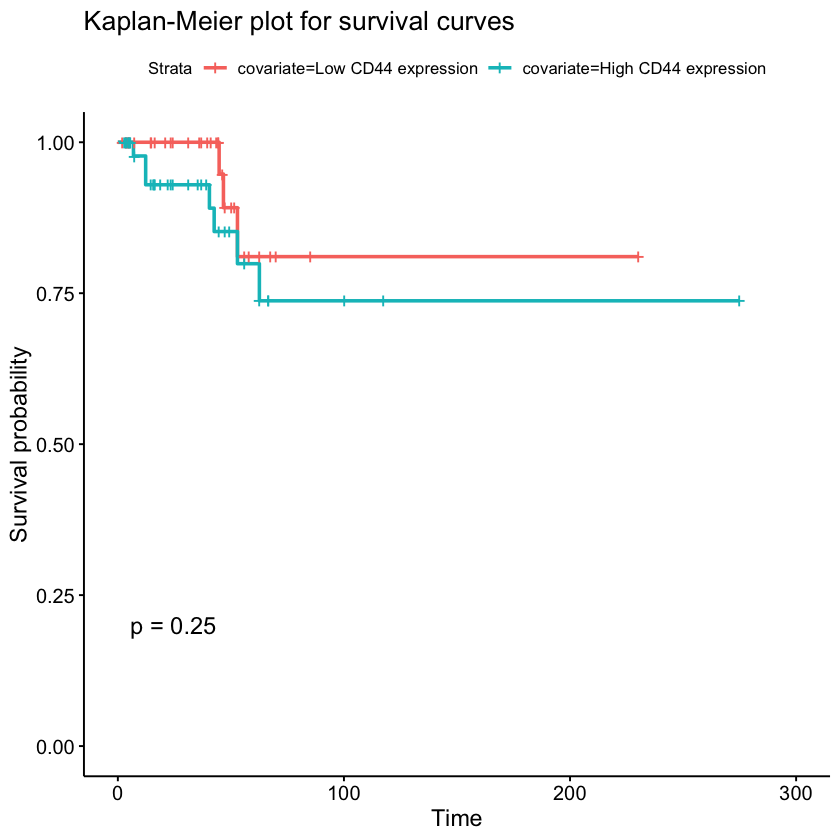

In [12]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

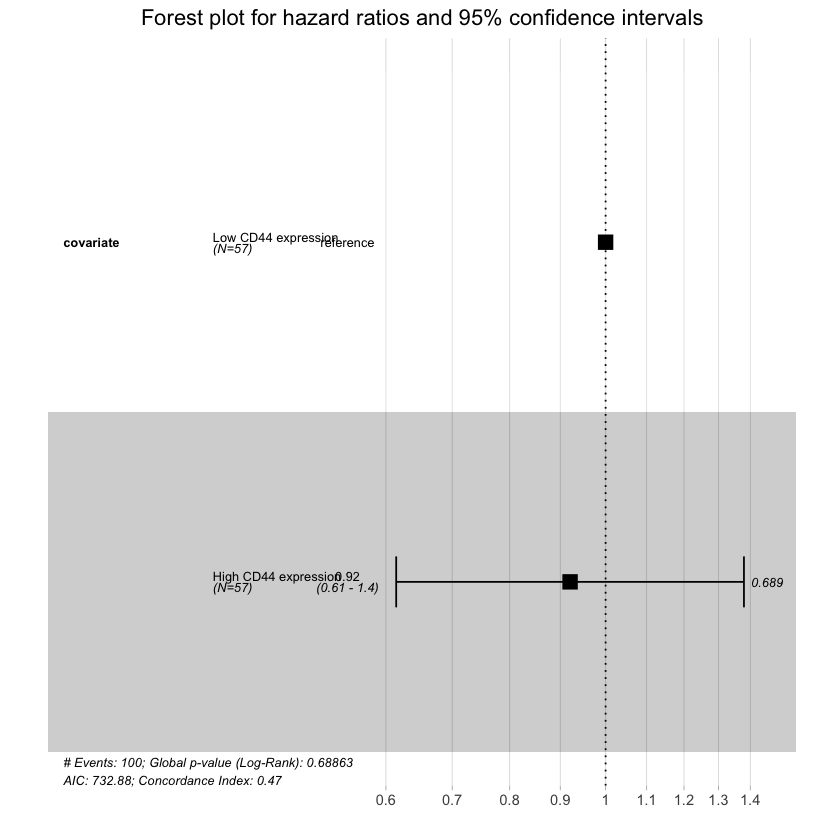

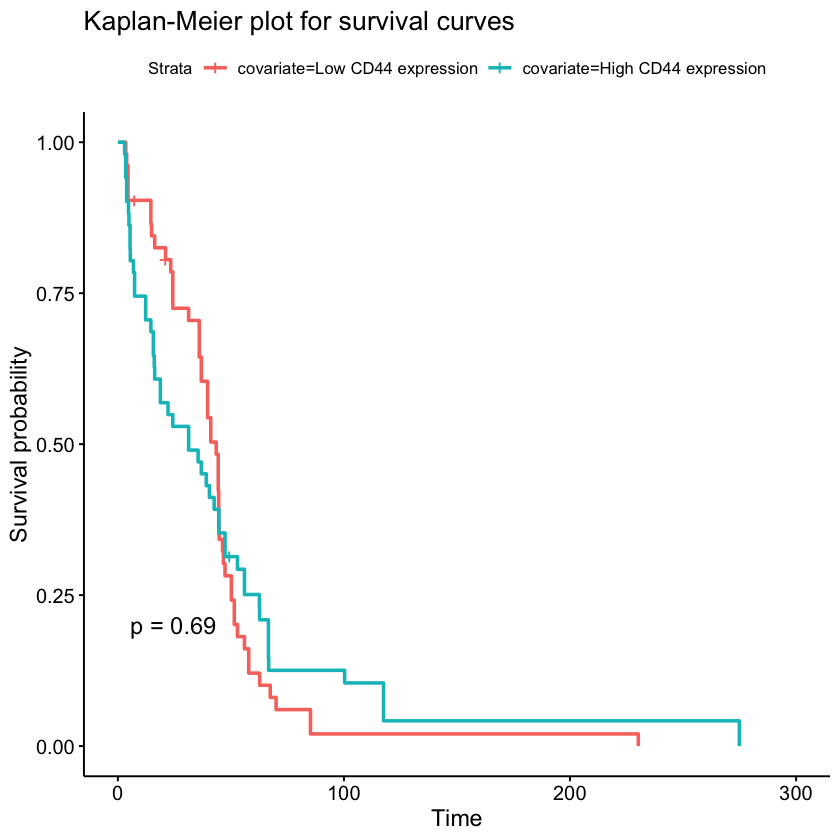

In [13]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

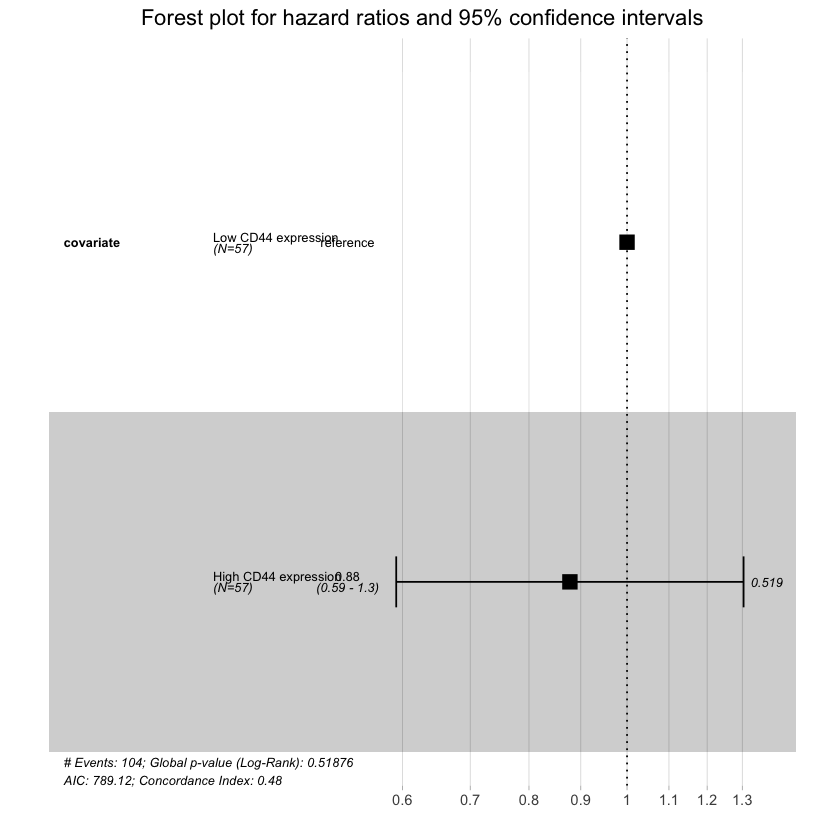

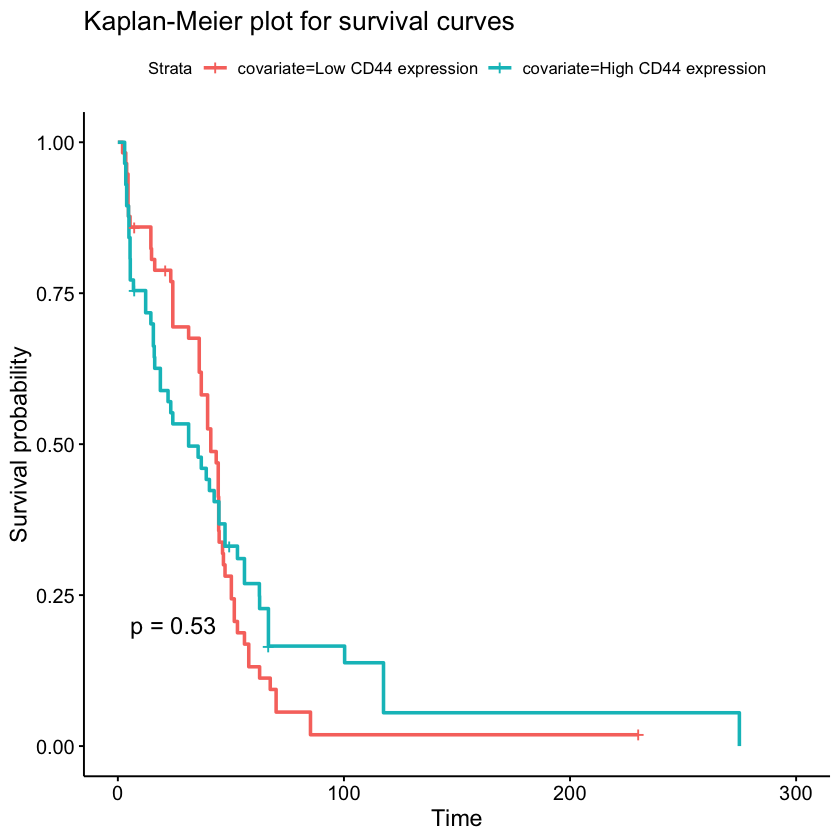

In [14]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

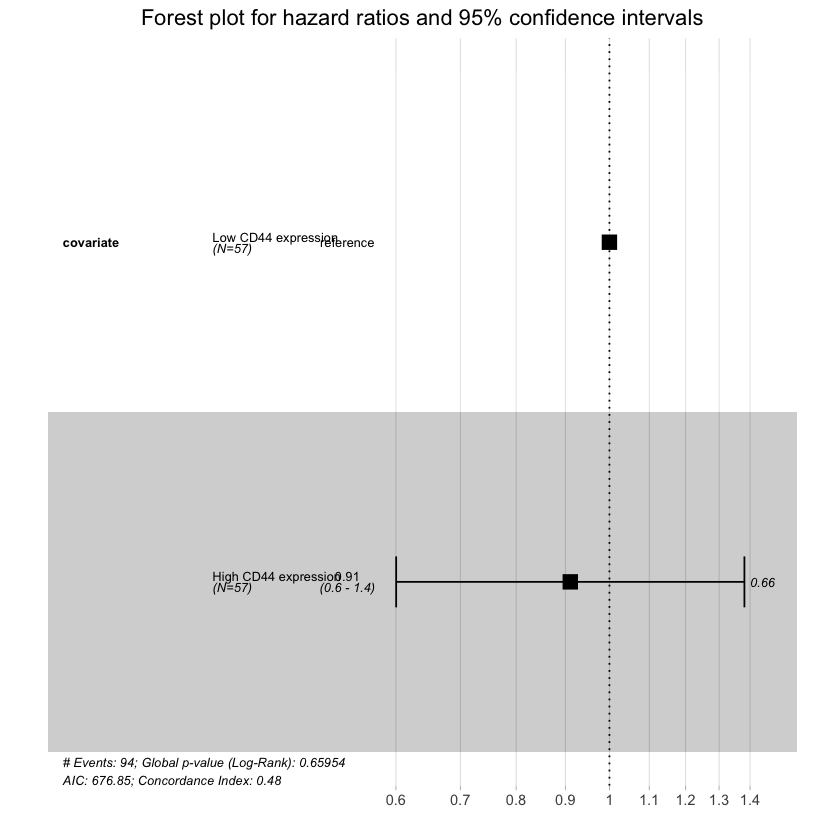

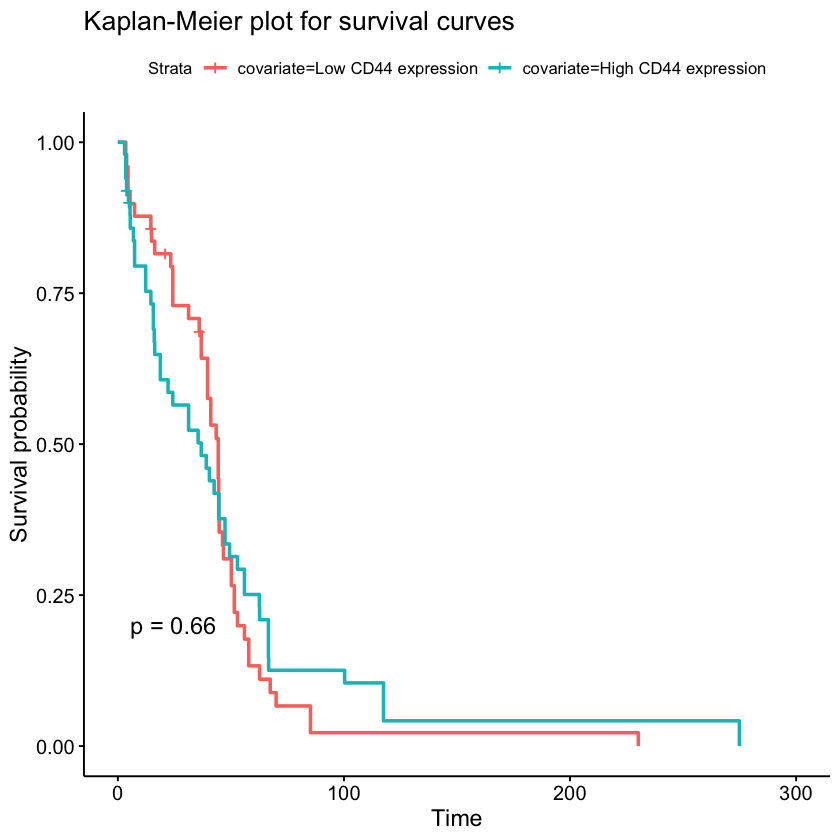

In [15]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

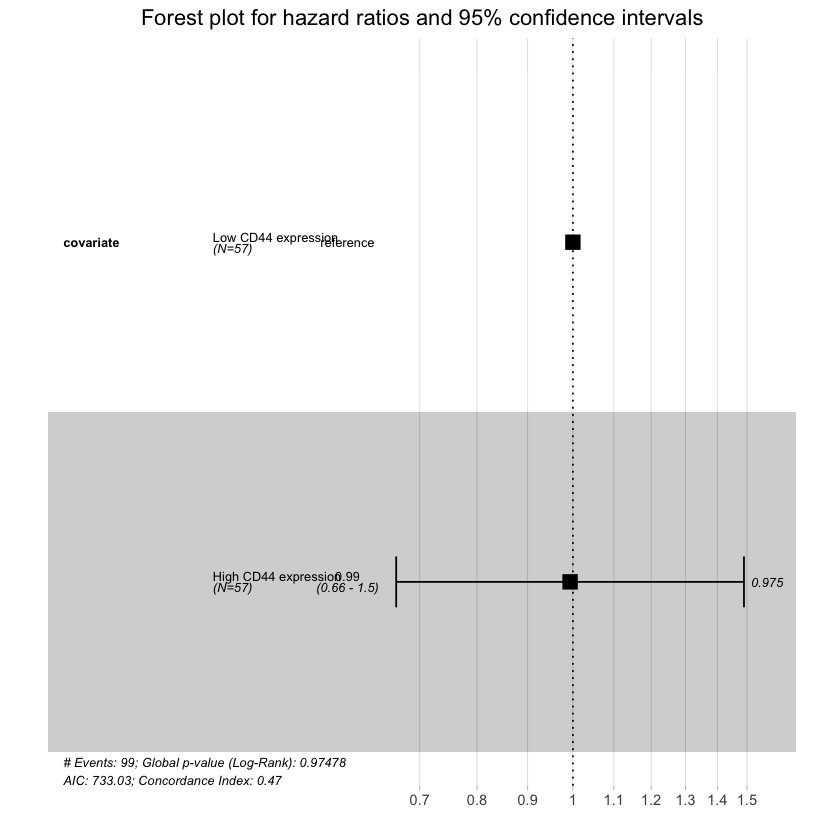

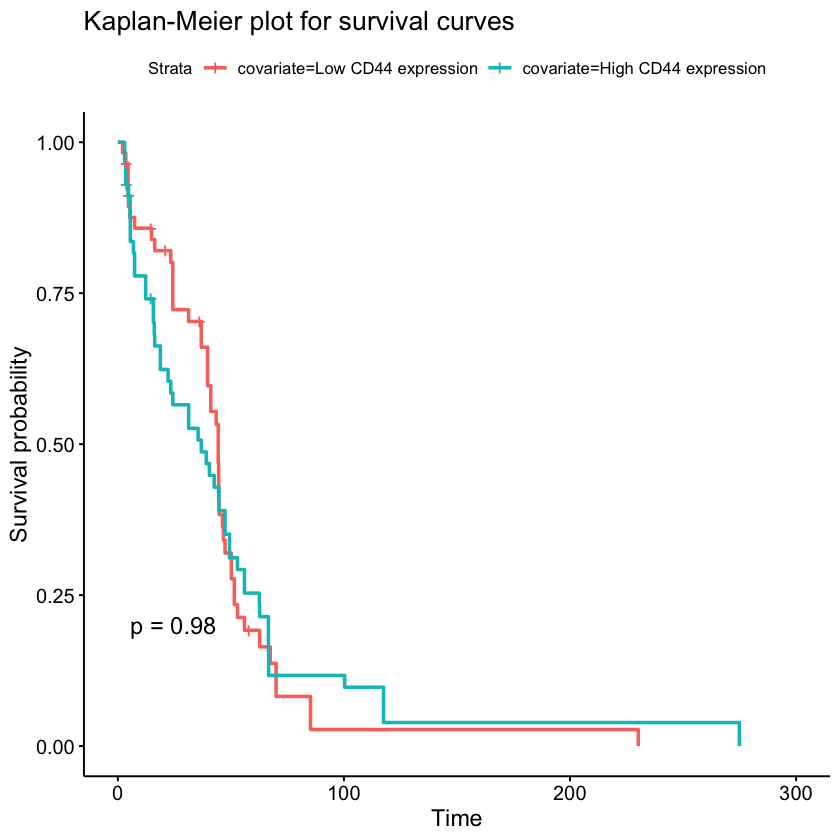

In [16]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)

## CK20

In [17]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = ck20_level)

### Tumor recurrence at next biopsy

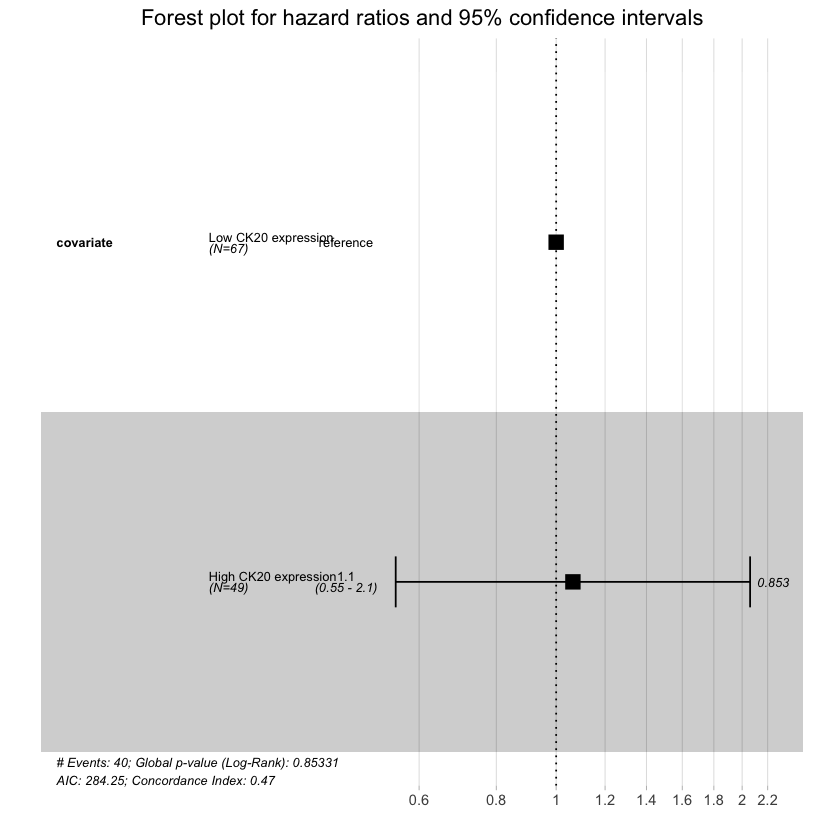

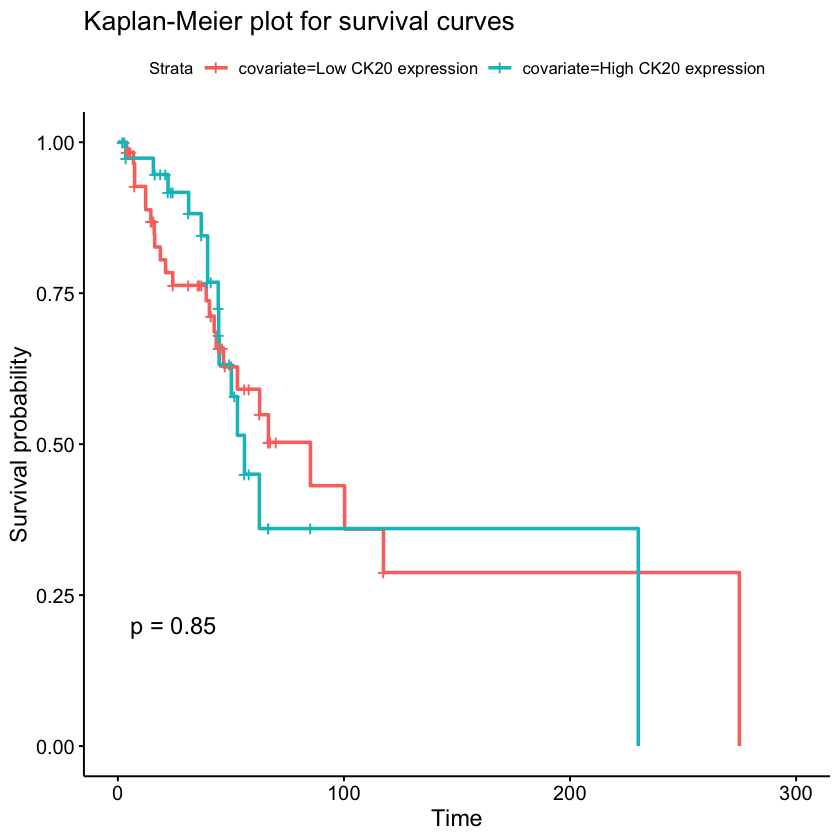

In [18]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

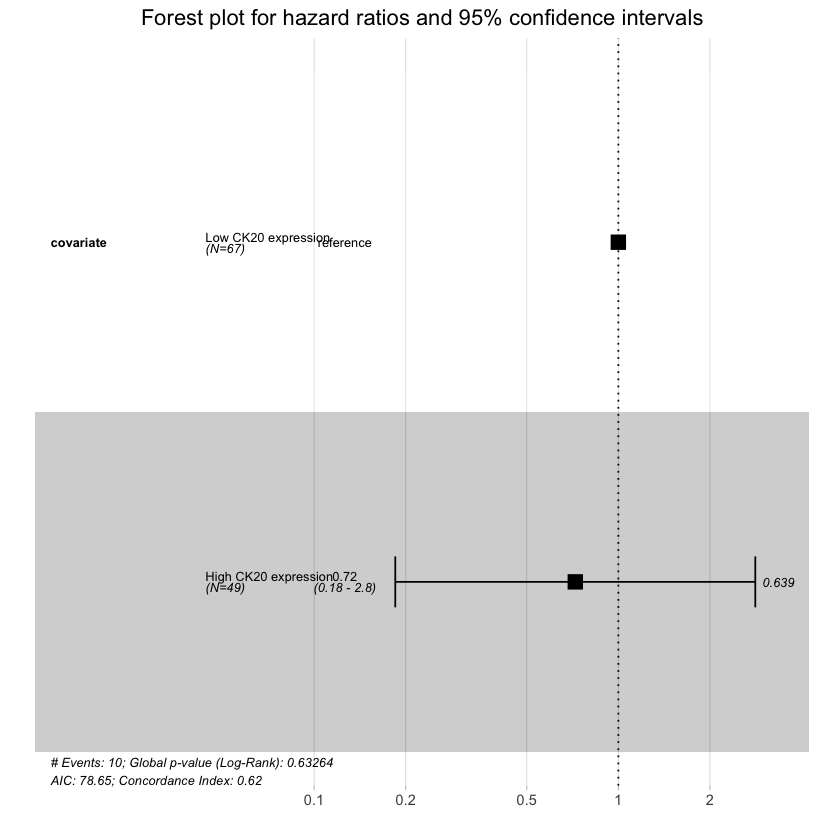

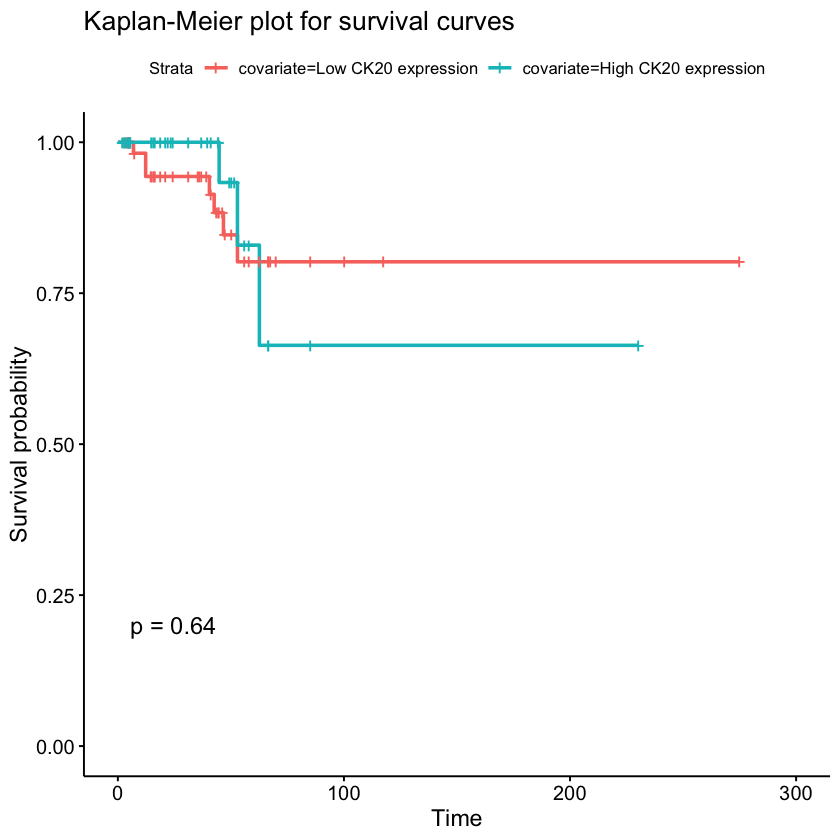

In [19]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

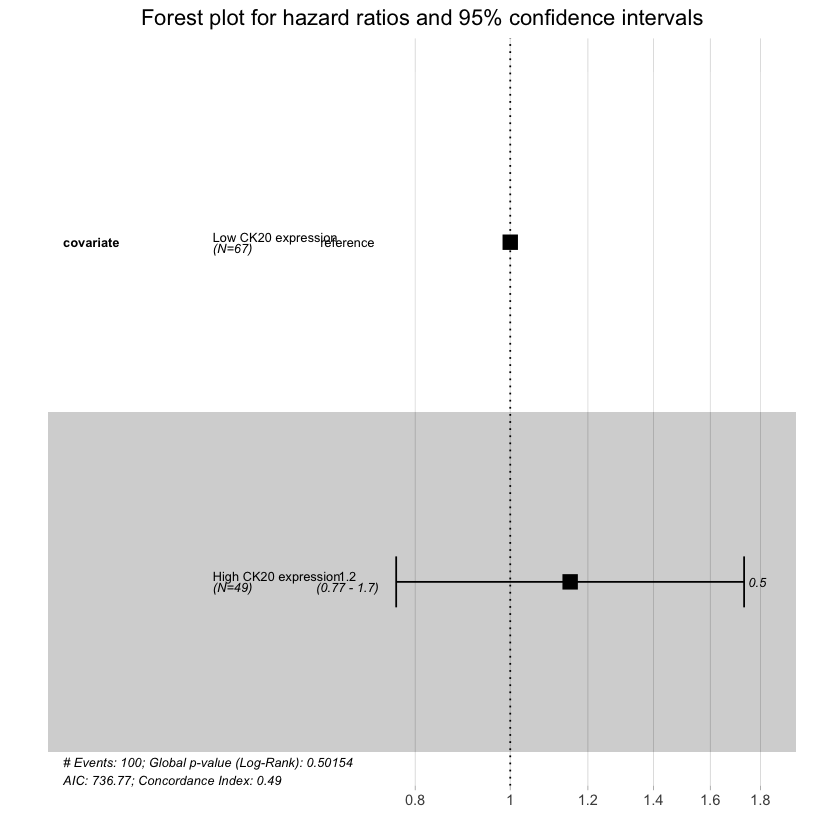

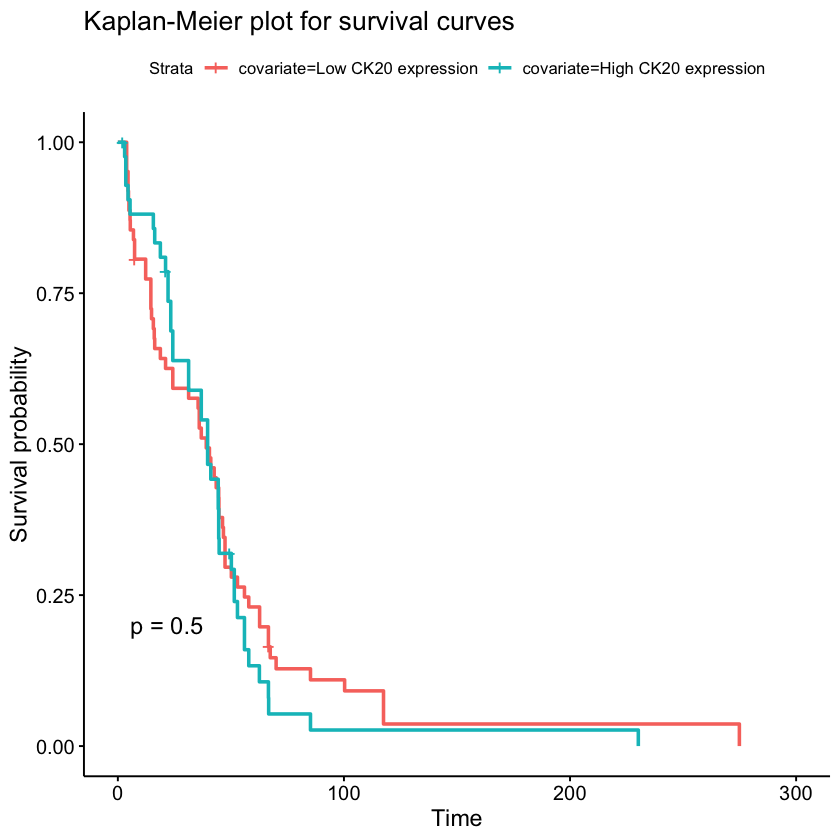

In [20]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

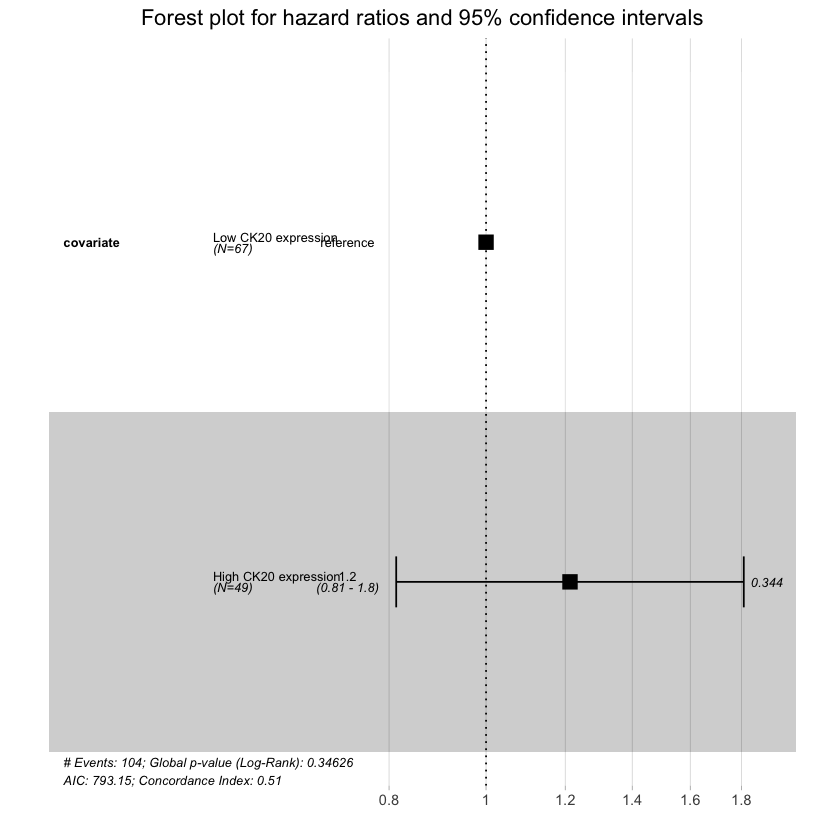

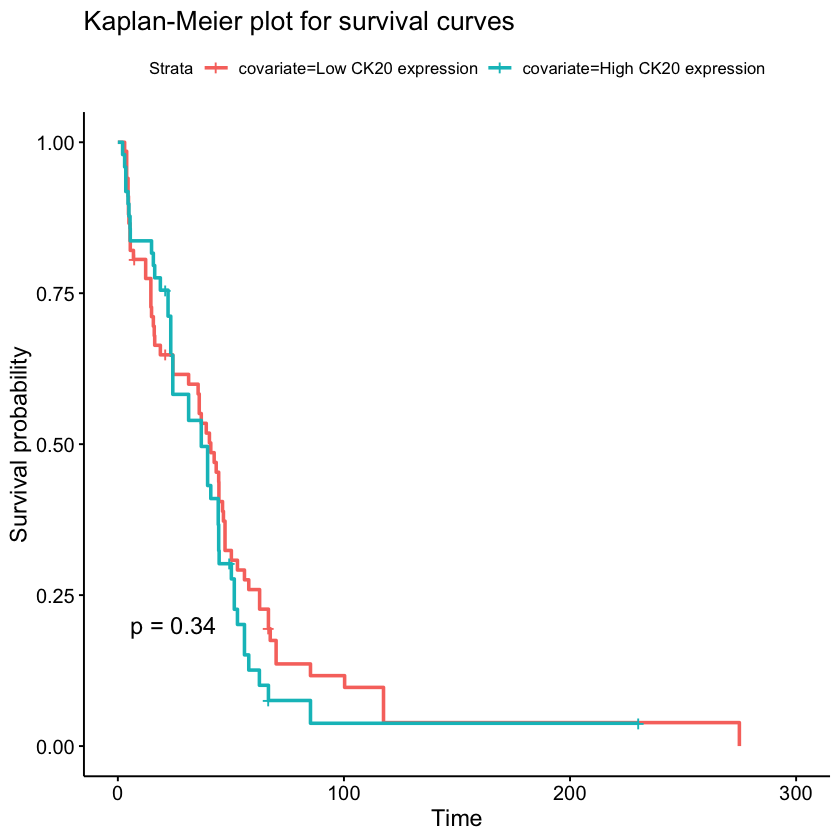

In [21]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

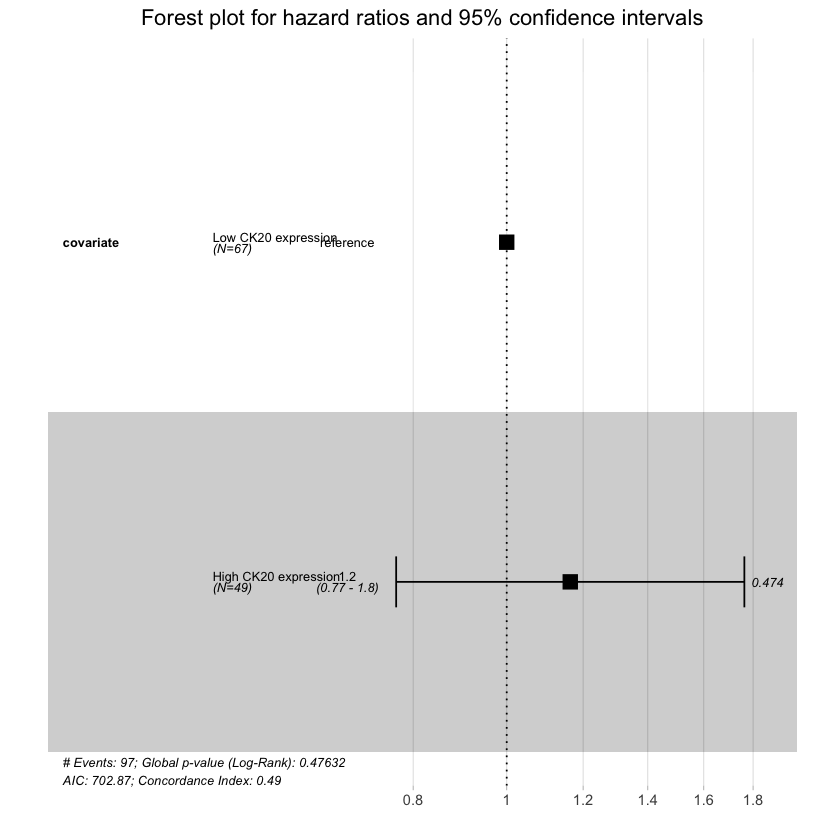

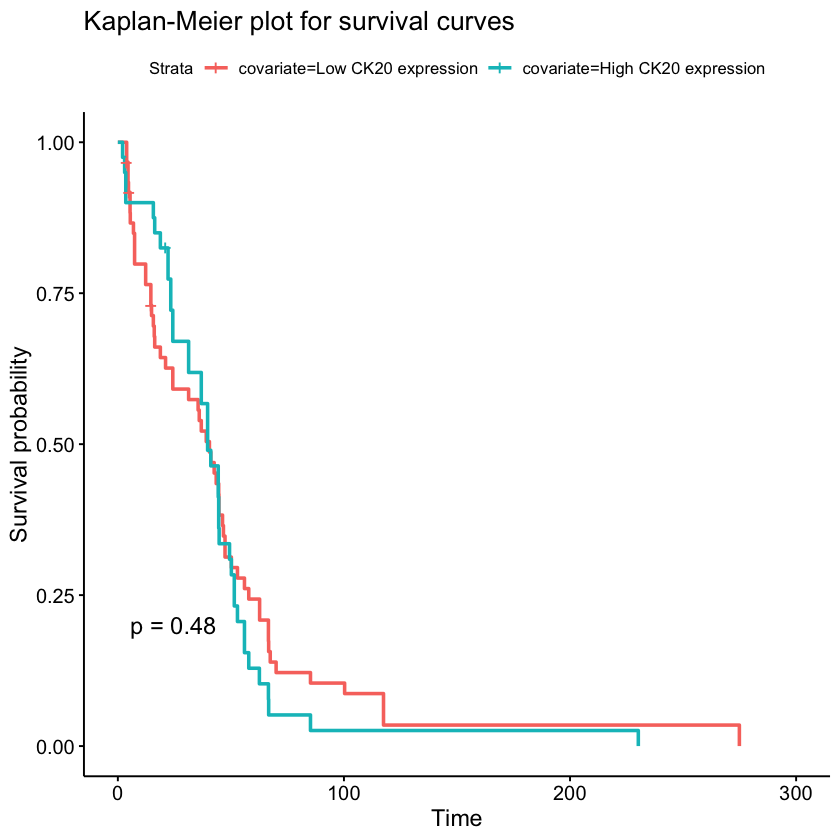

In [22]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

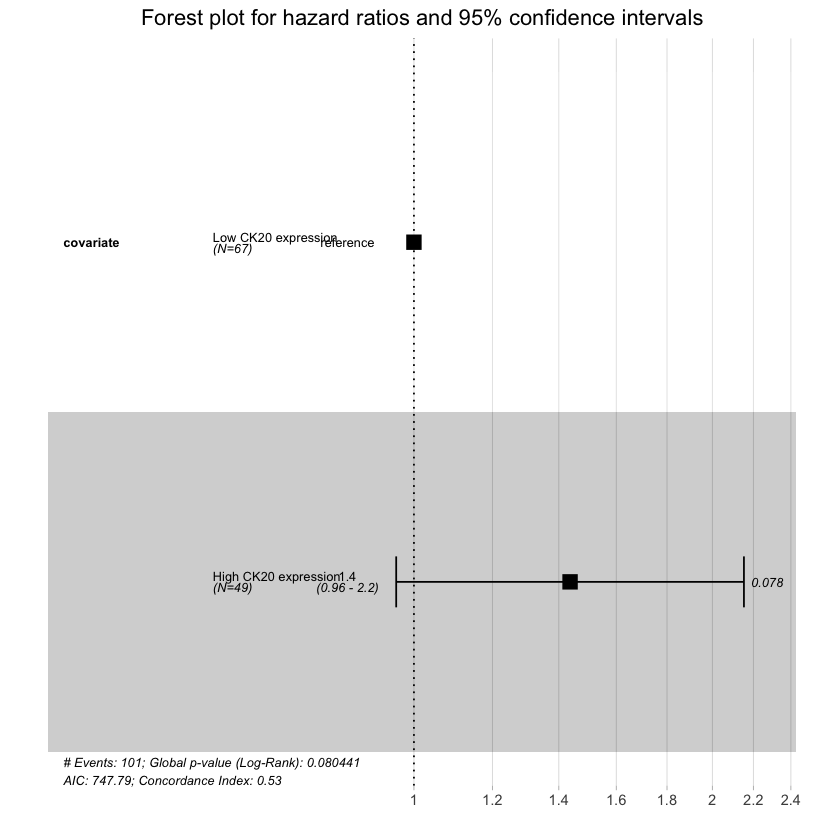

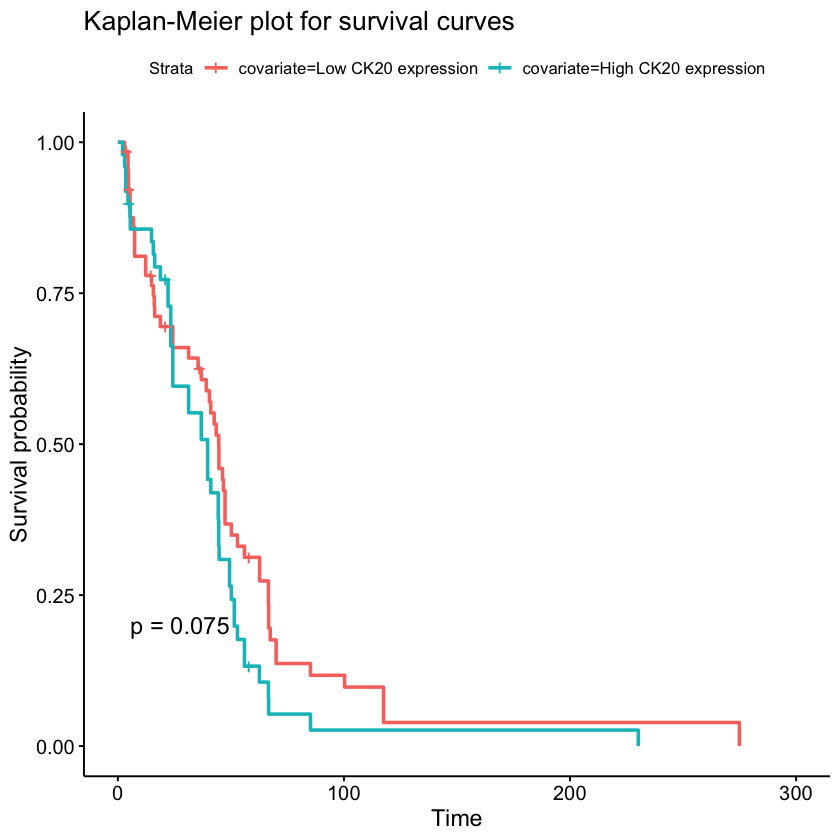

In [23]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)

## ER

In [24]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = er_level)

### Tumor recurrence at next biopsy

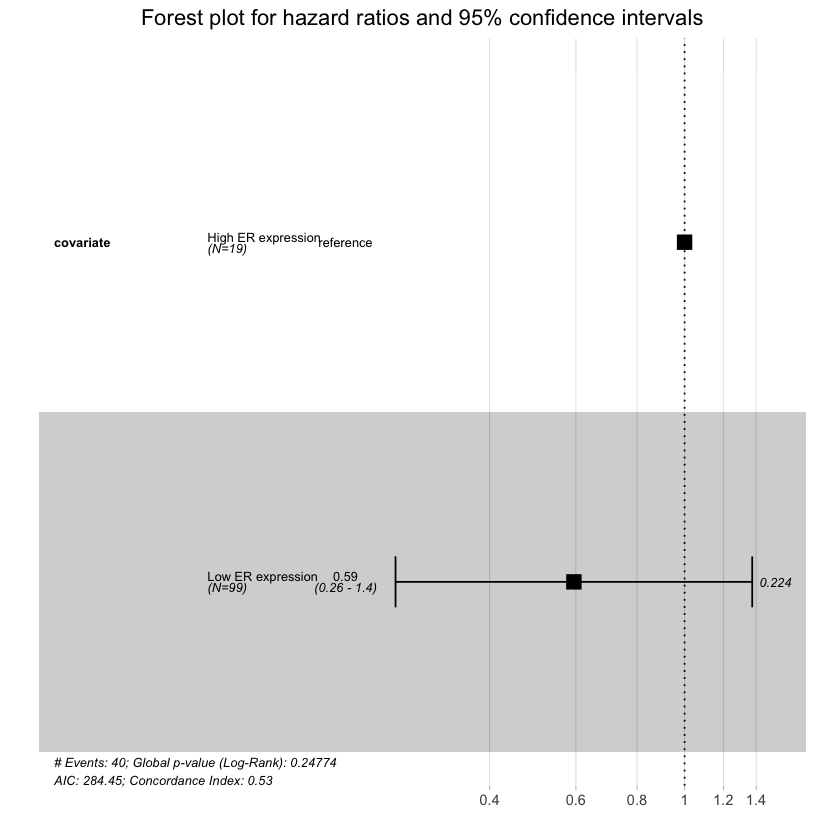

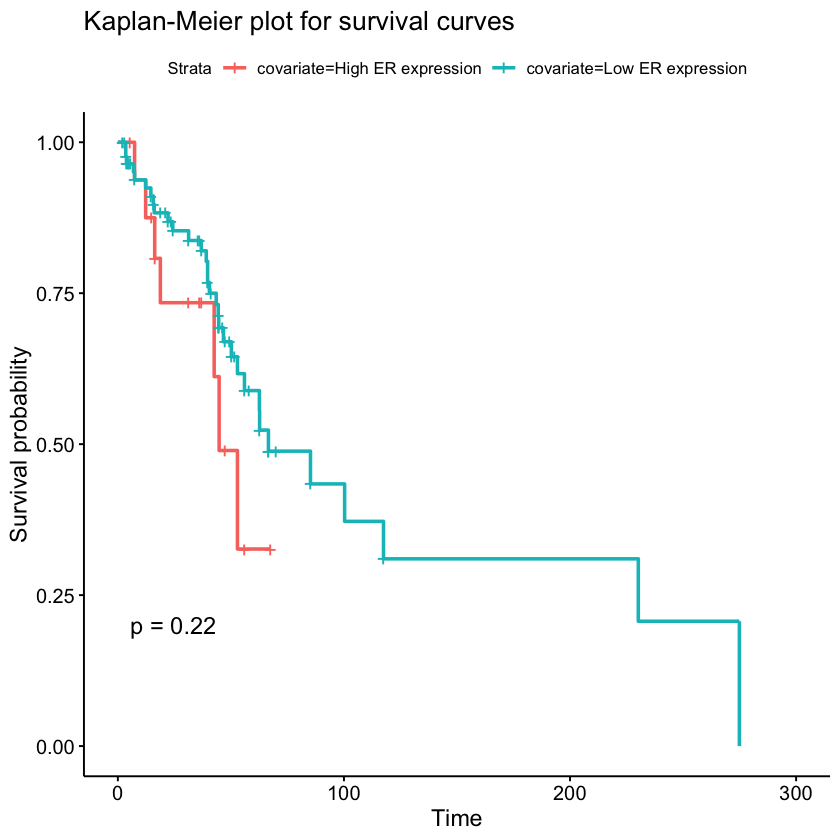

In [25]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

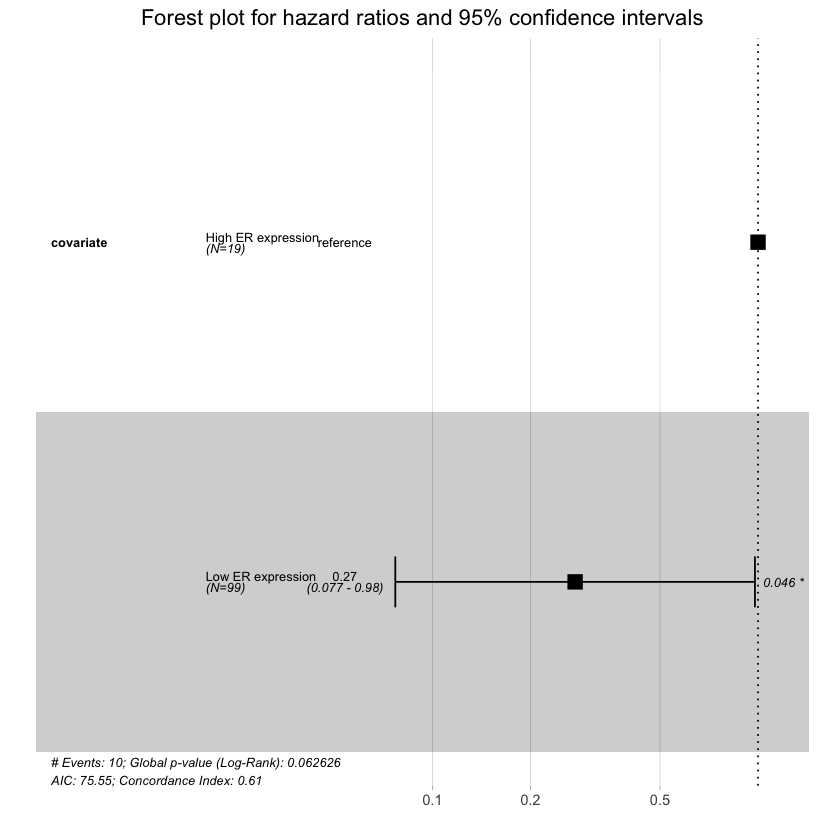

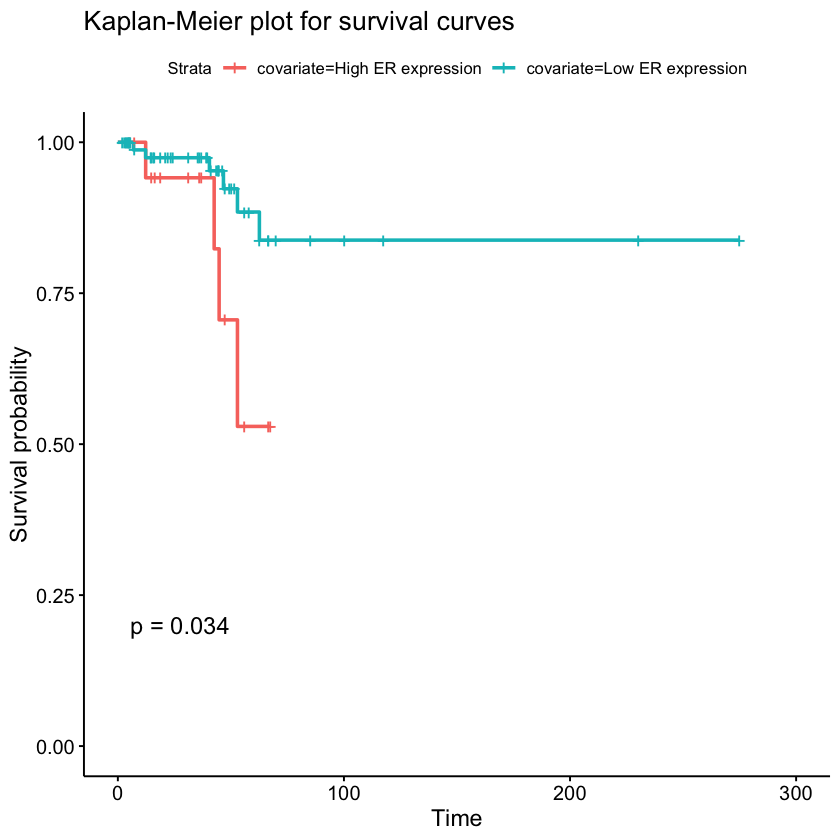

In [26]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

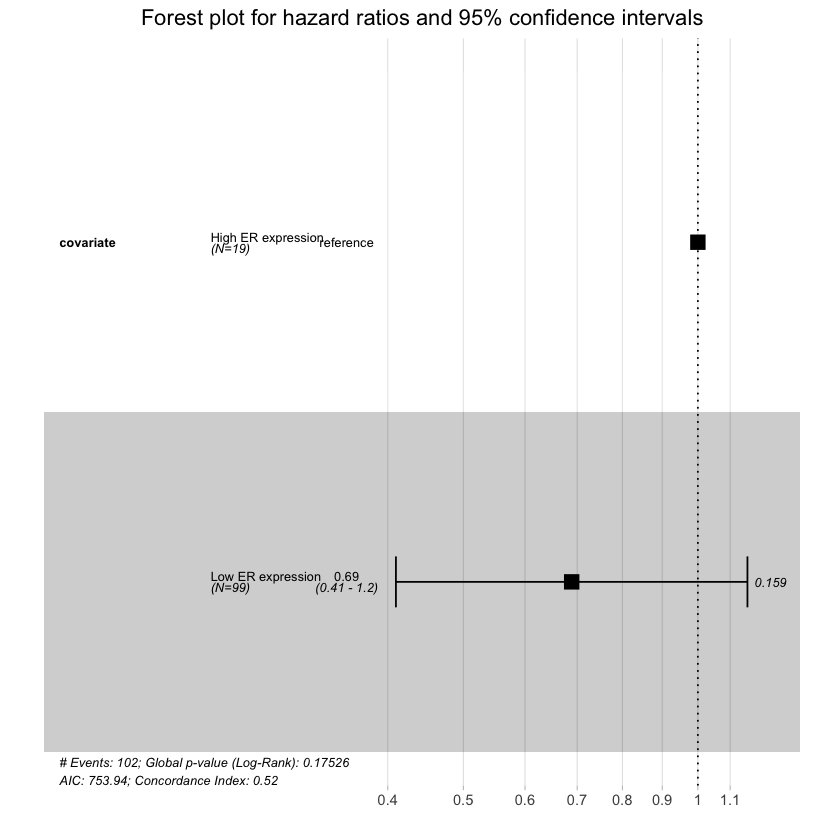

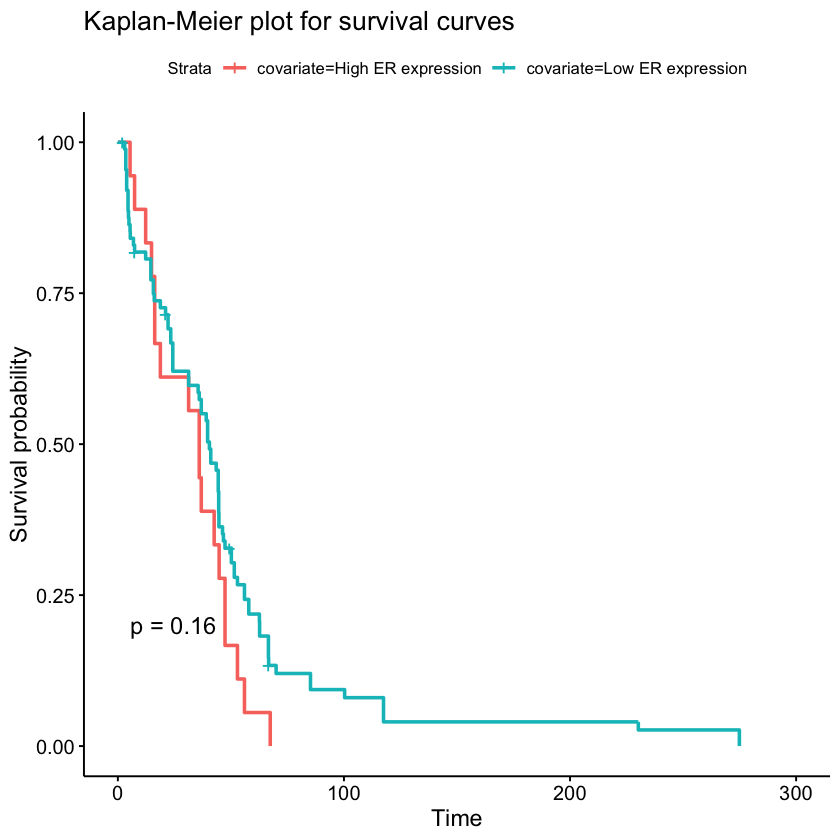

In [27]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

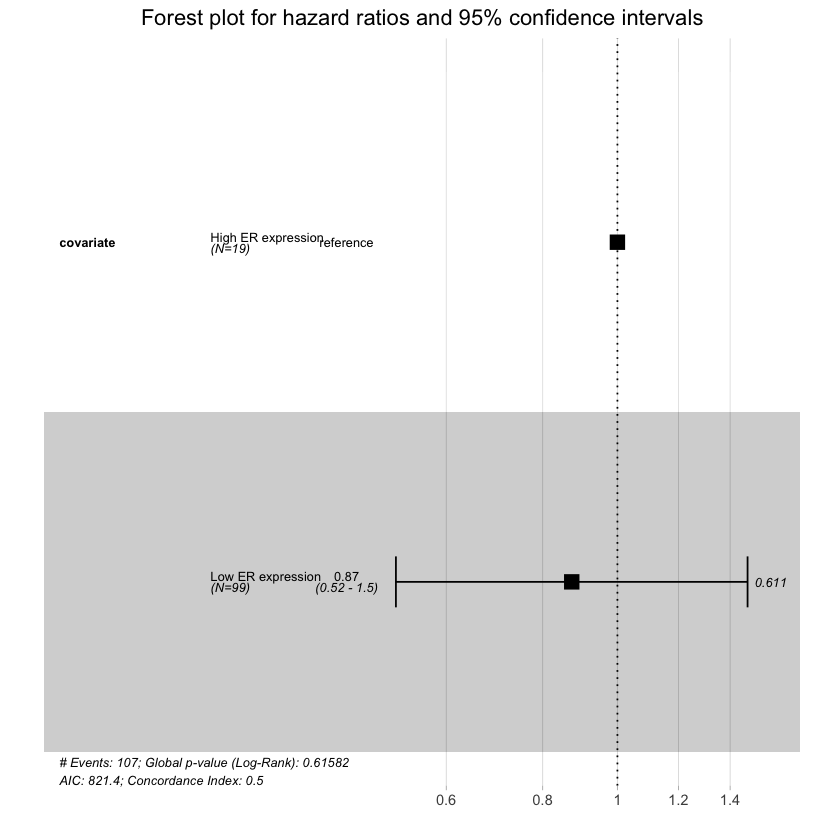

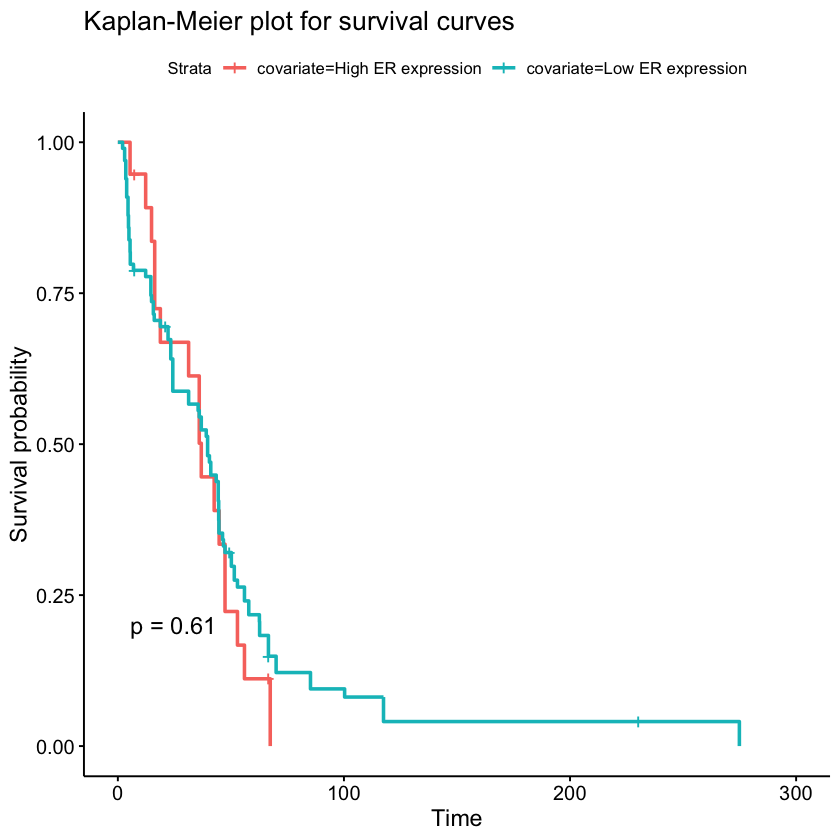

In [28]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

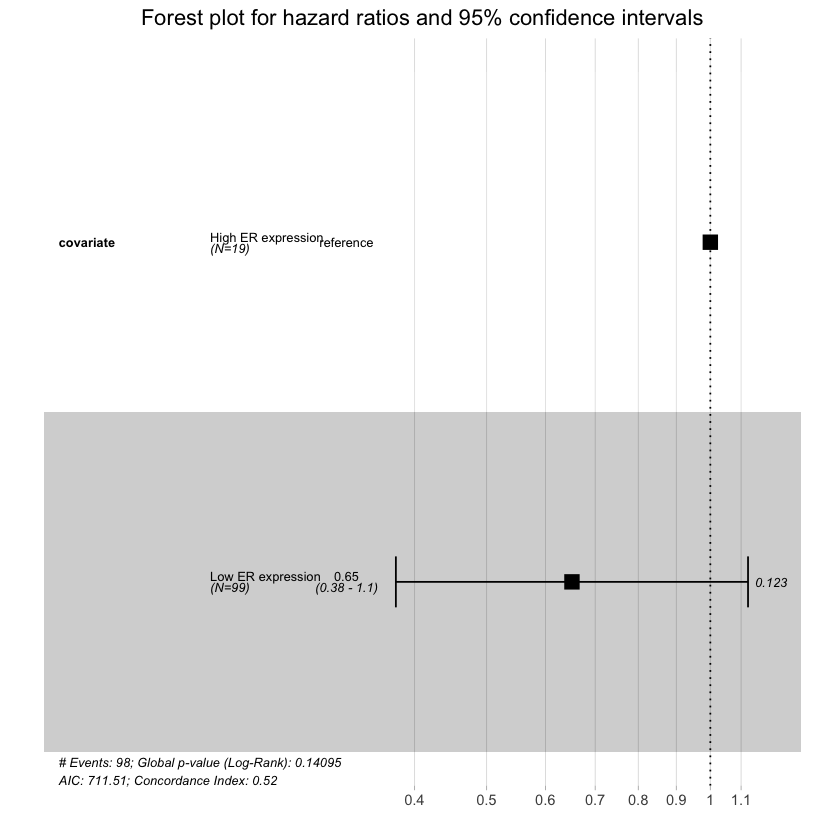

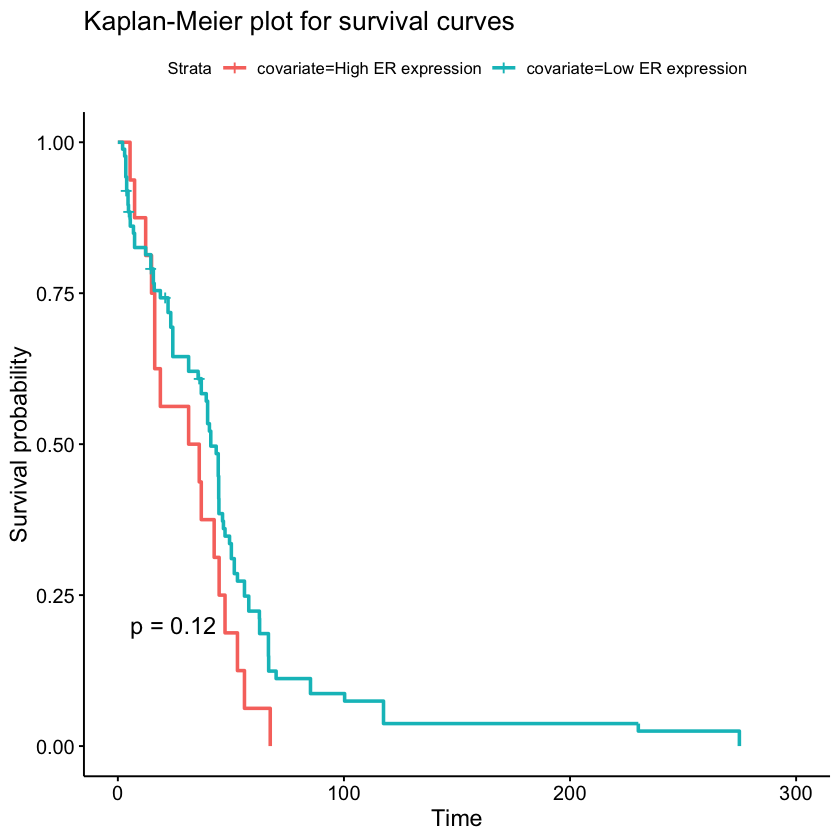

In [29]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

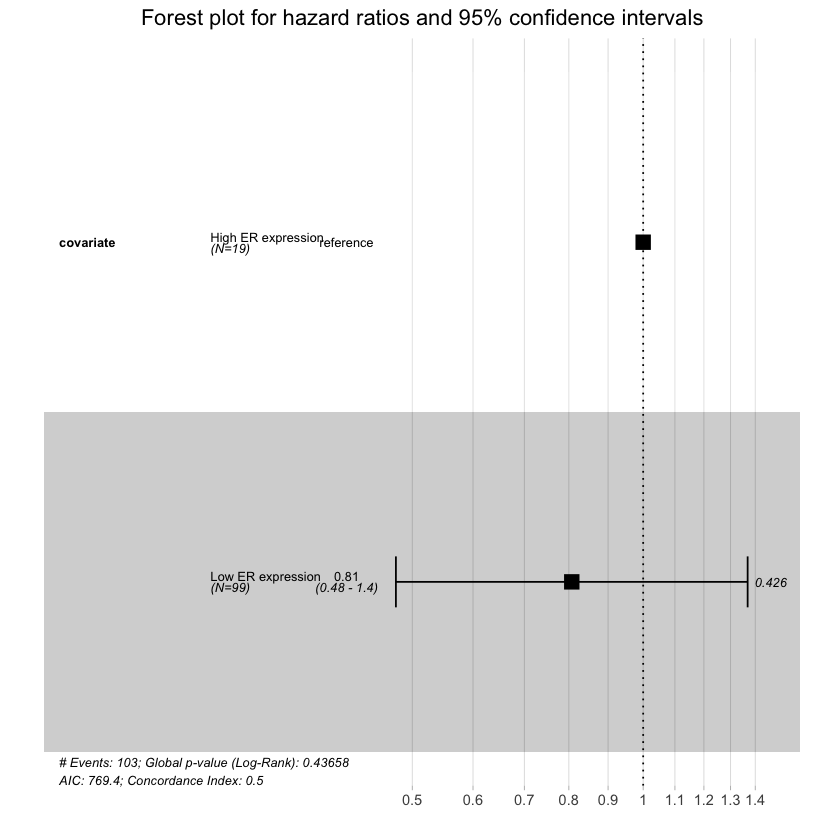

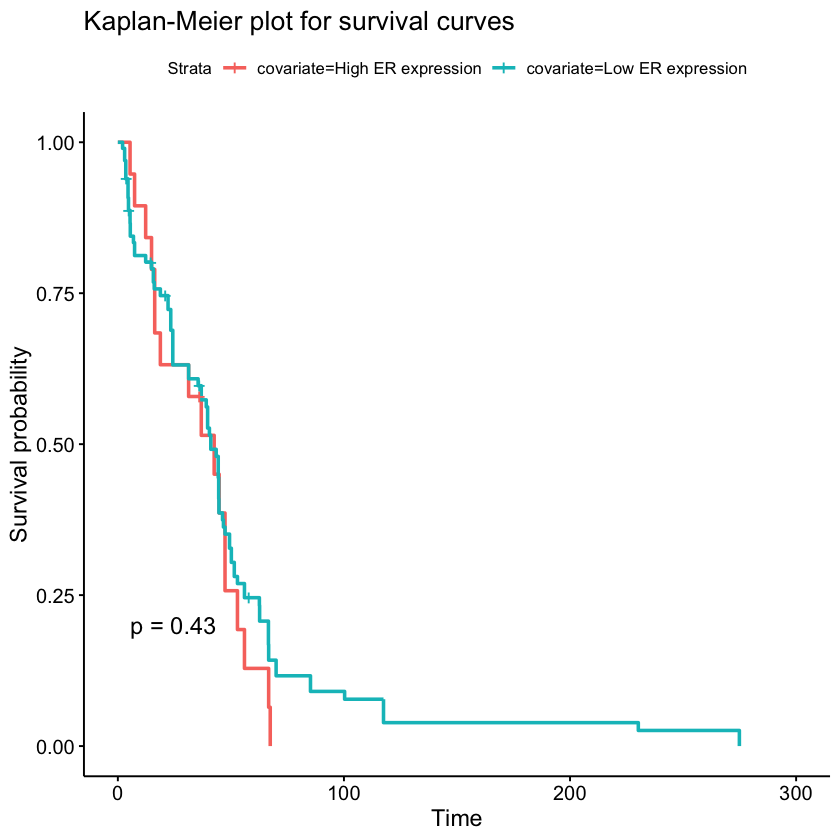

In [30]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)

## HER2

In [31]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = her2_level)

### Tumor recurrence at next biopsy

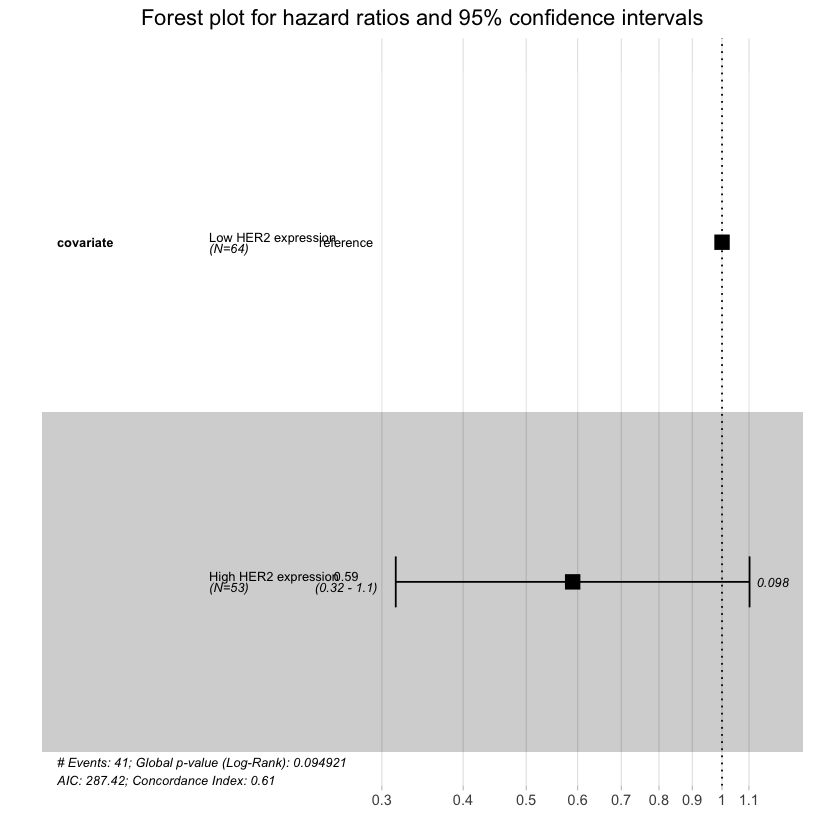

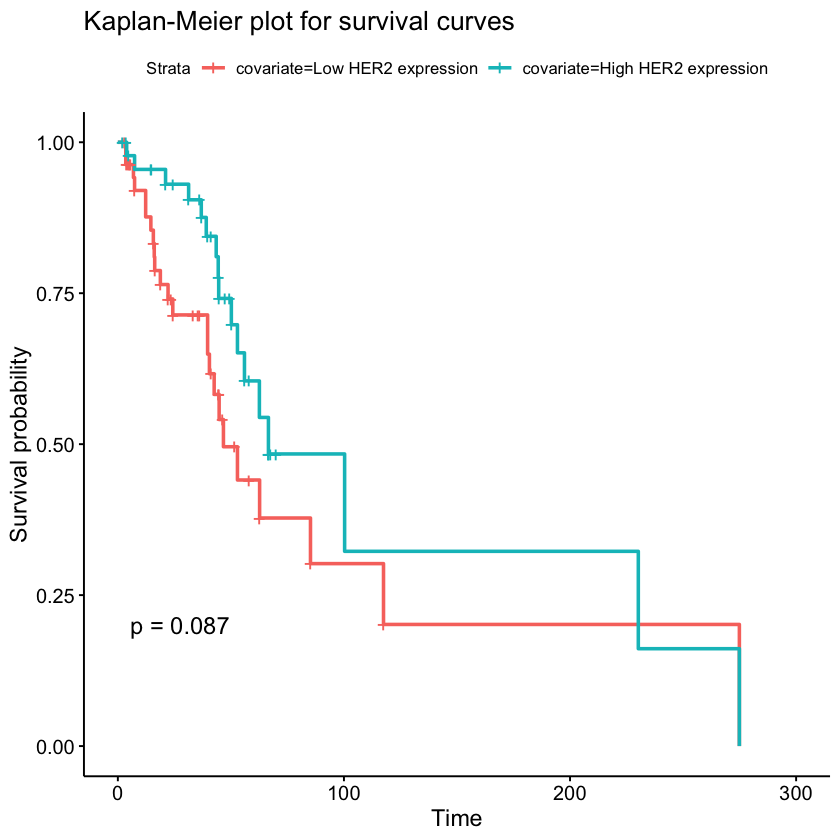

In [32]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

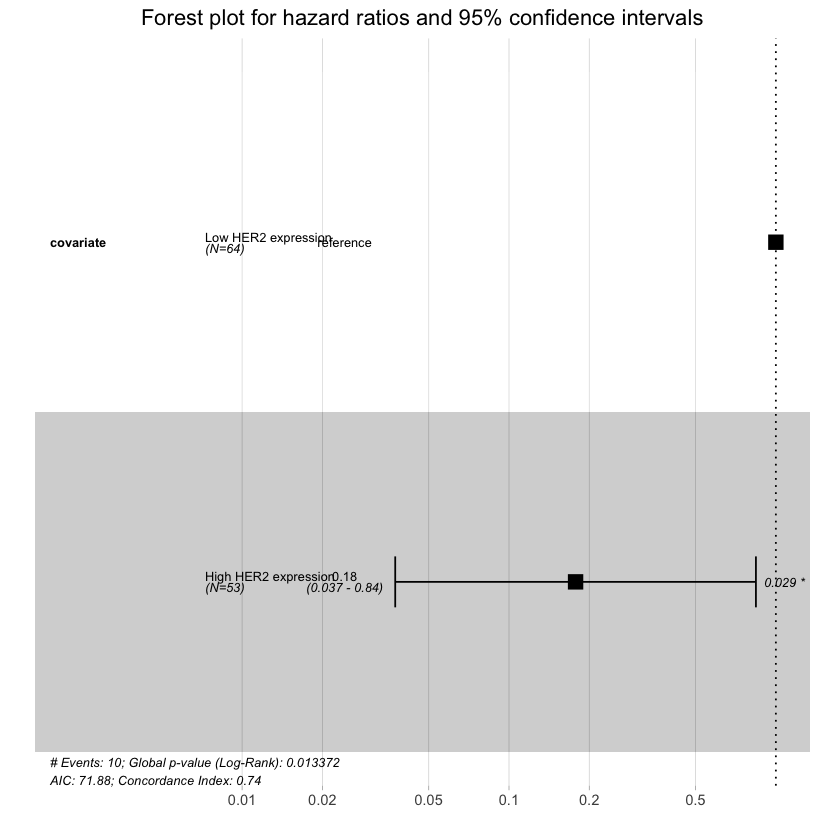

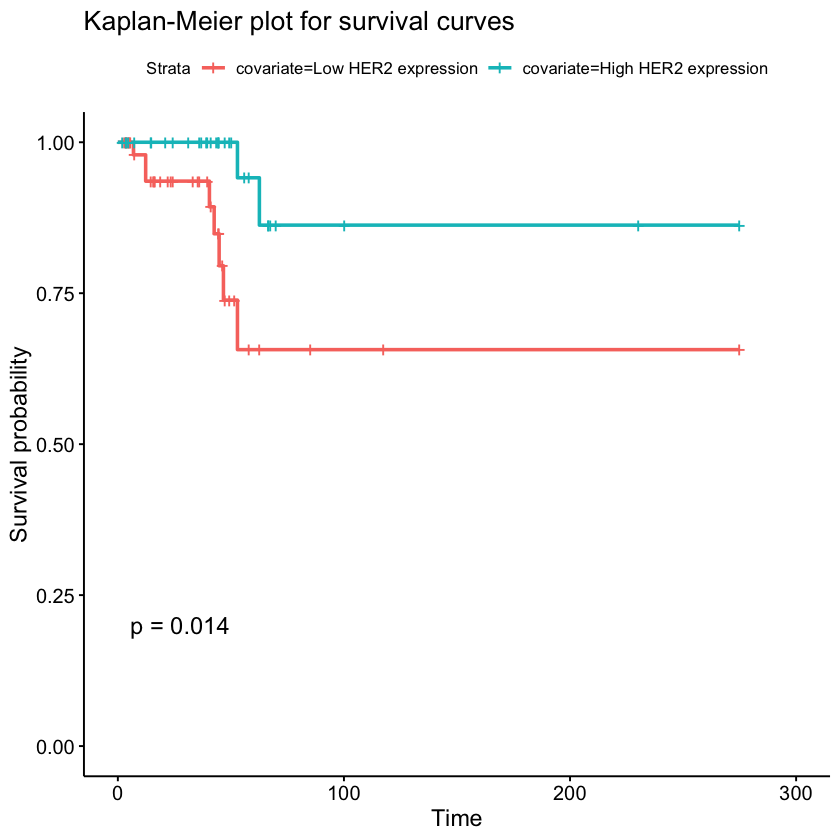

In [33]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

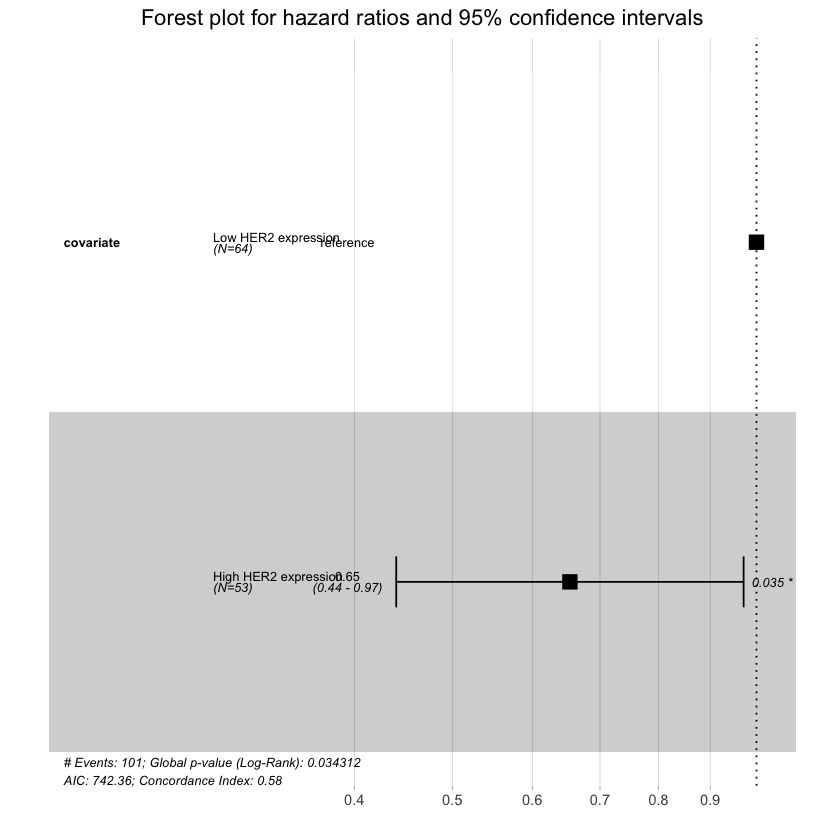

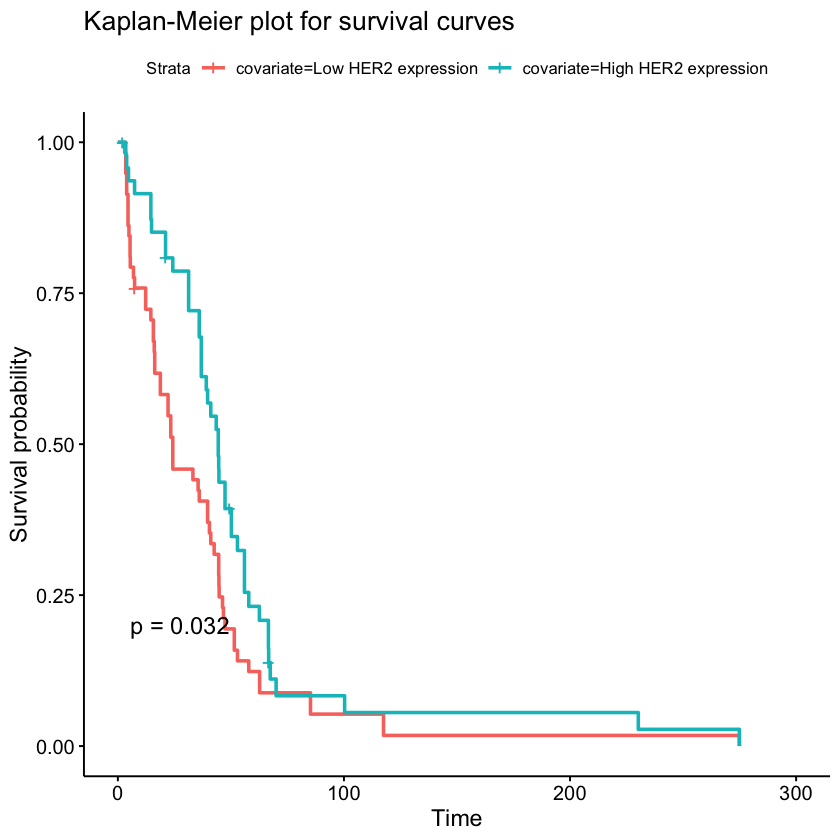

In [34]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

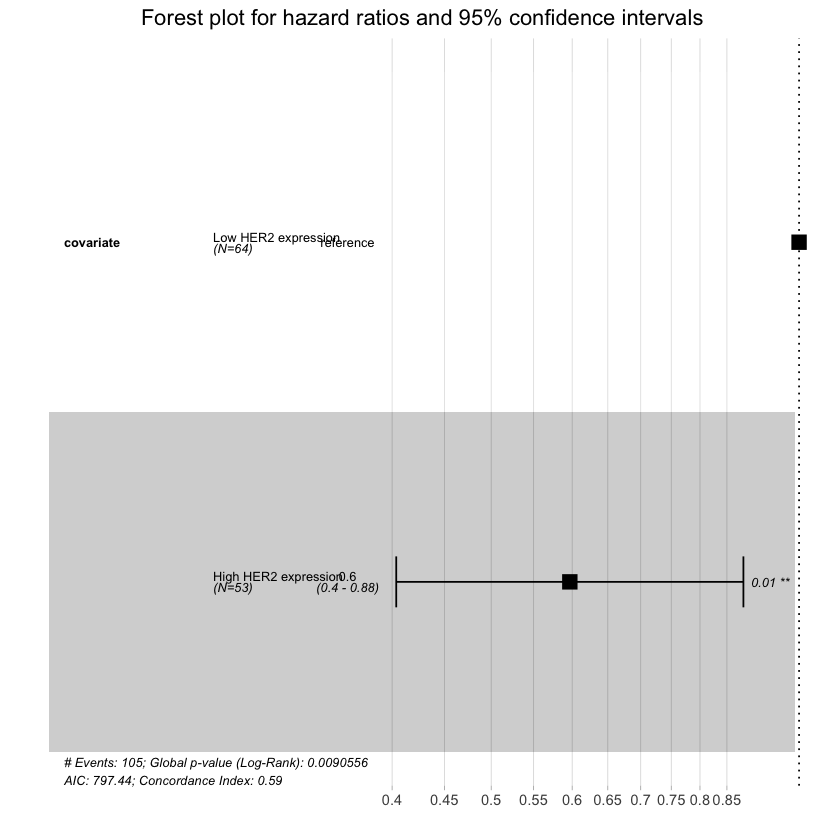

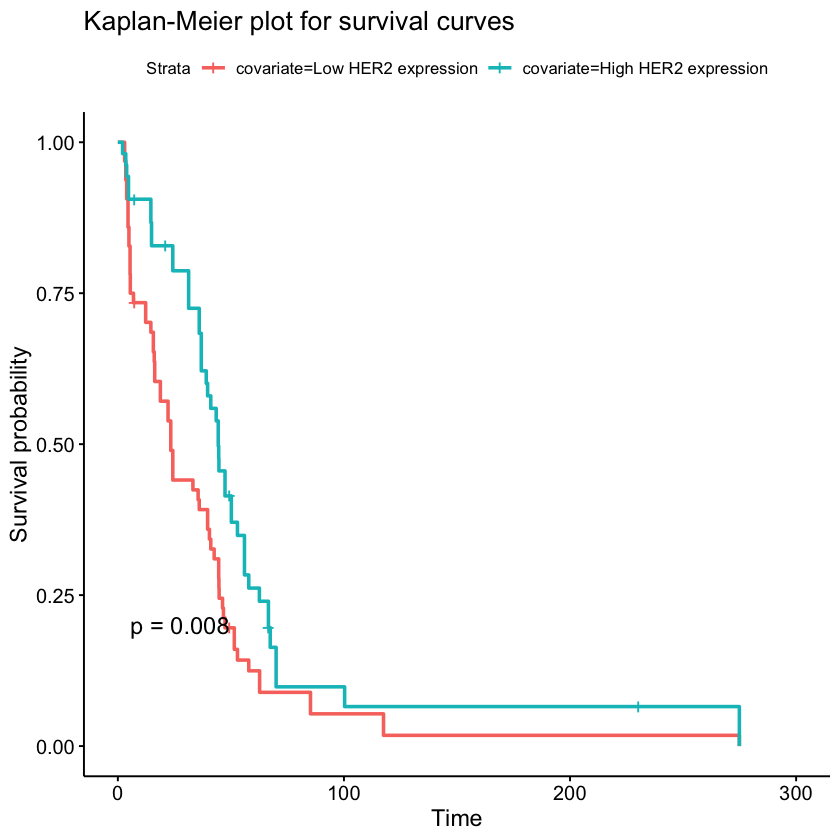

In [35]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

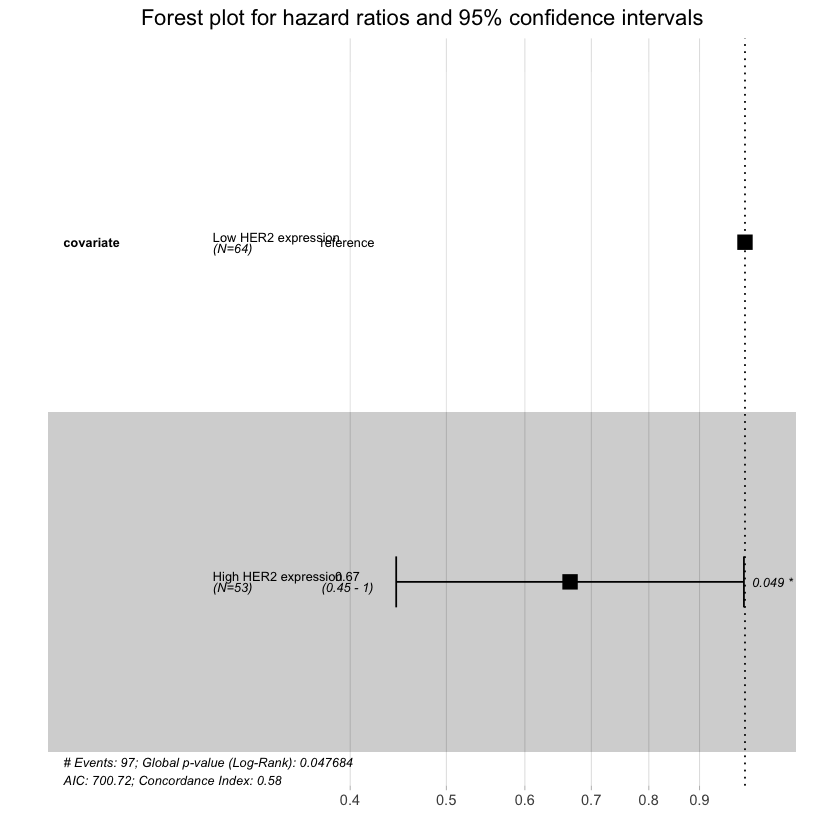

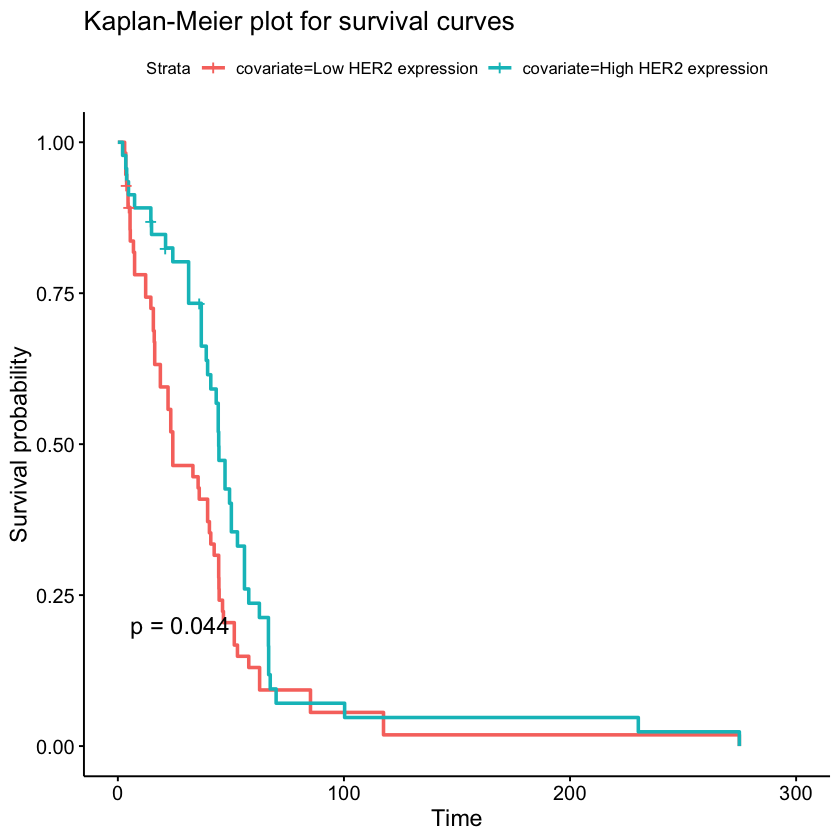

In [36]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

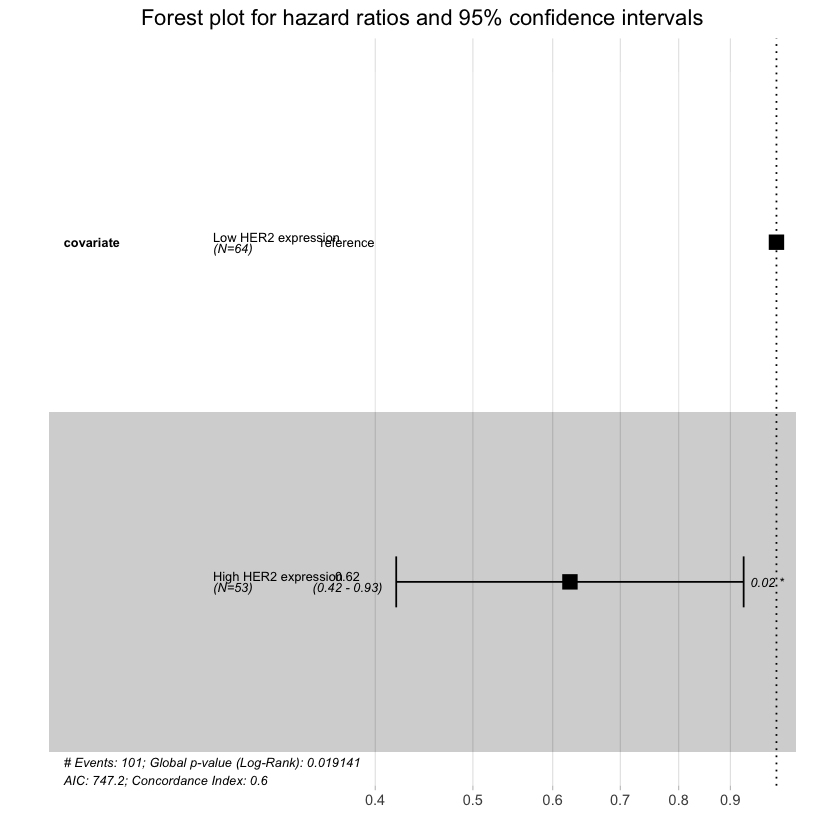

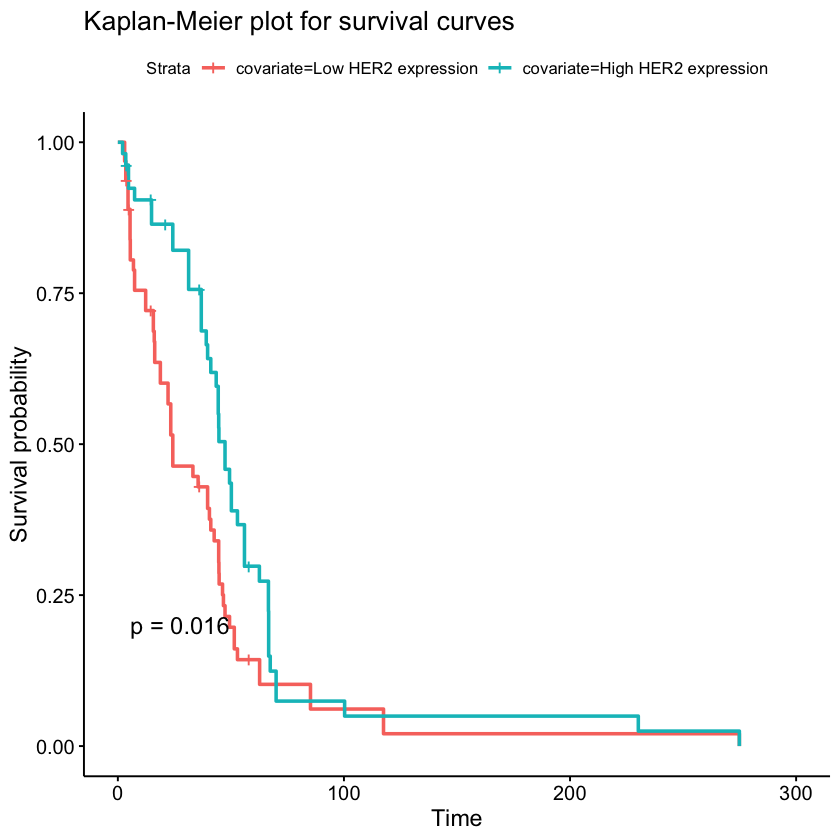

In [37]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)

## GATA3

In [38]:
OUTCOME <- OUTCOME %>% 
  mutate(biomarker_level = gata3_level)

### Tumor recurrence at next biopsy

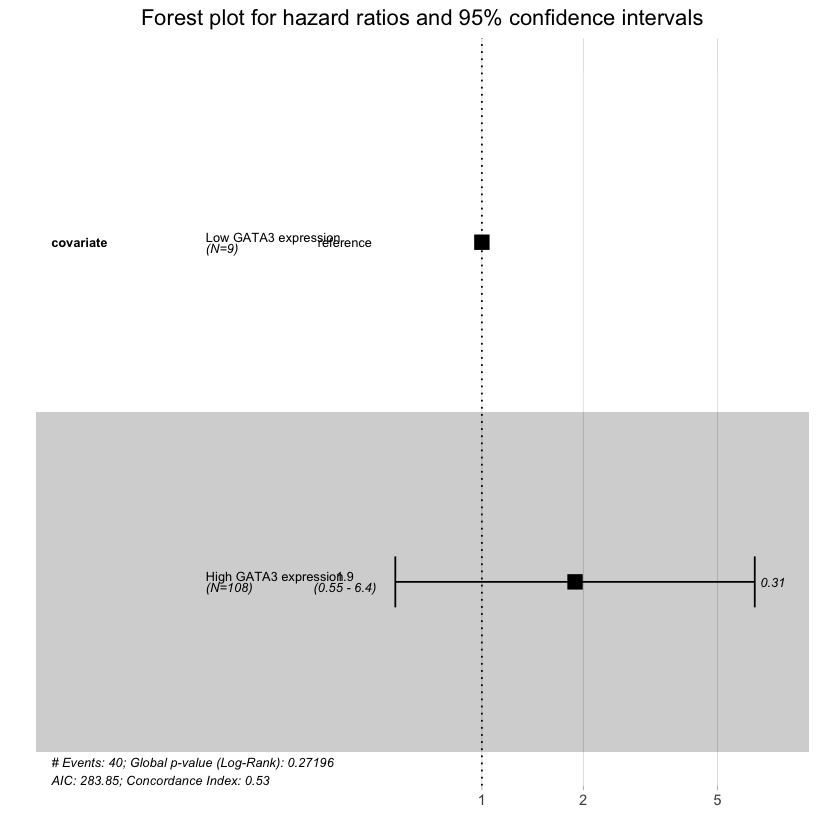

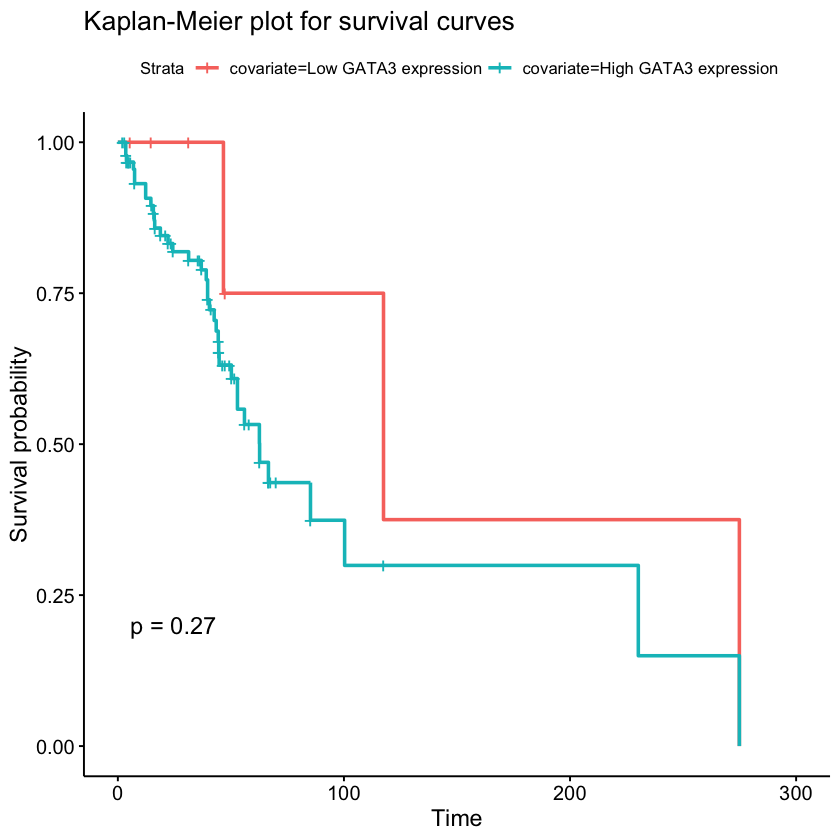

In [39]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_next, biomarker_level)

### Tumor recurrence at any biopsy

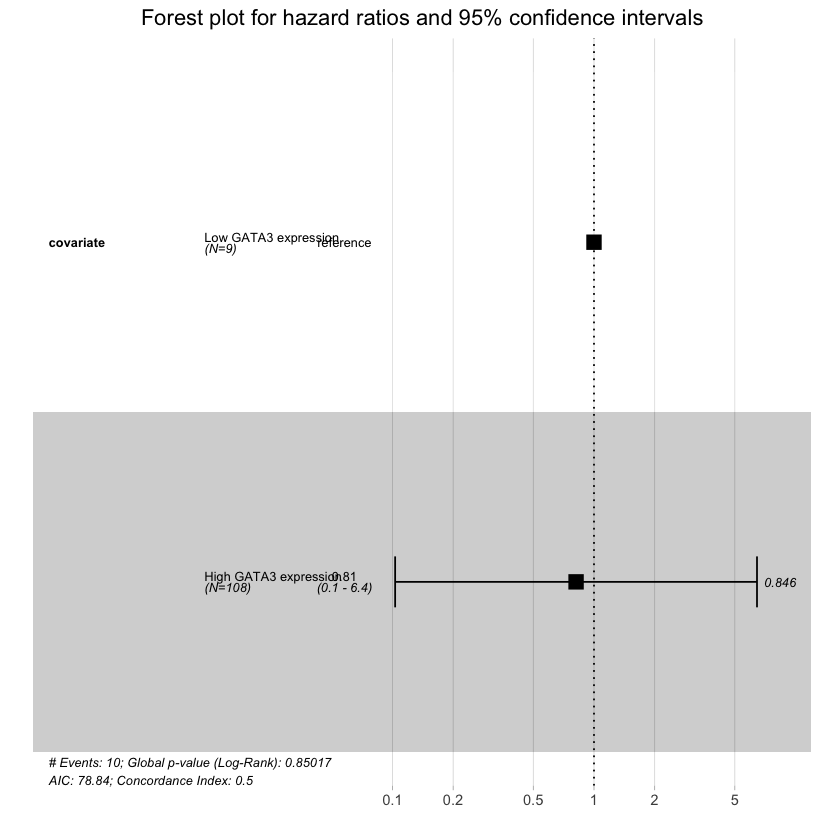

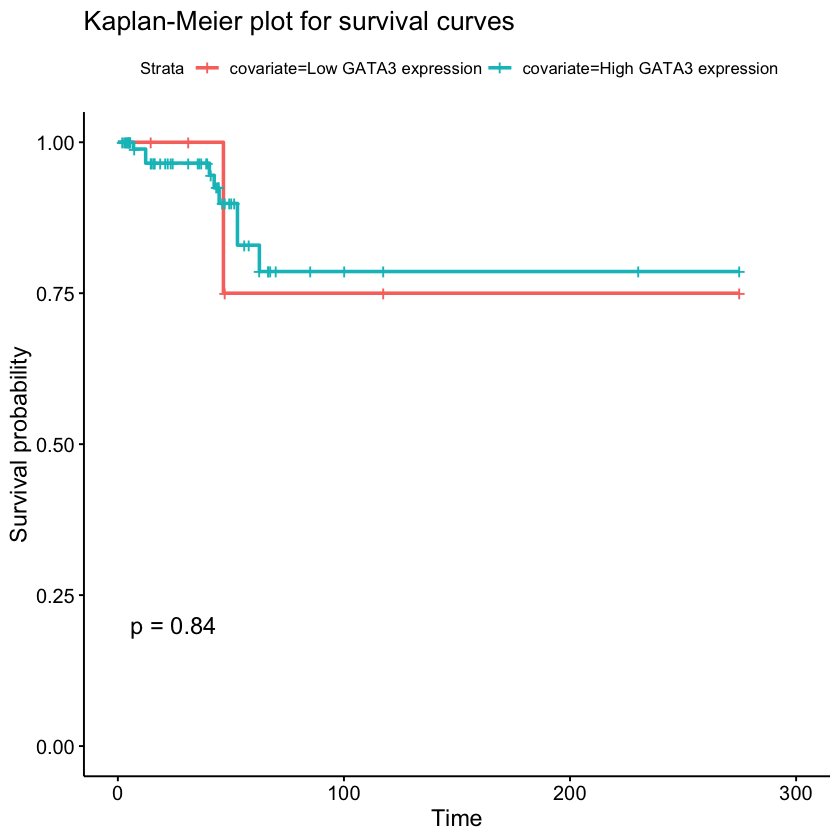

In [40]:
OUTCOME %>% summarize_surv(fu_mo, recurrence_any, biomarker_level)

### Tumor grade progression at next biopsy

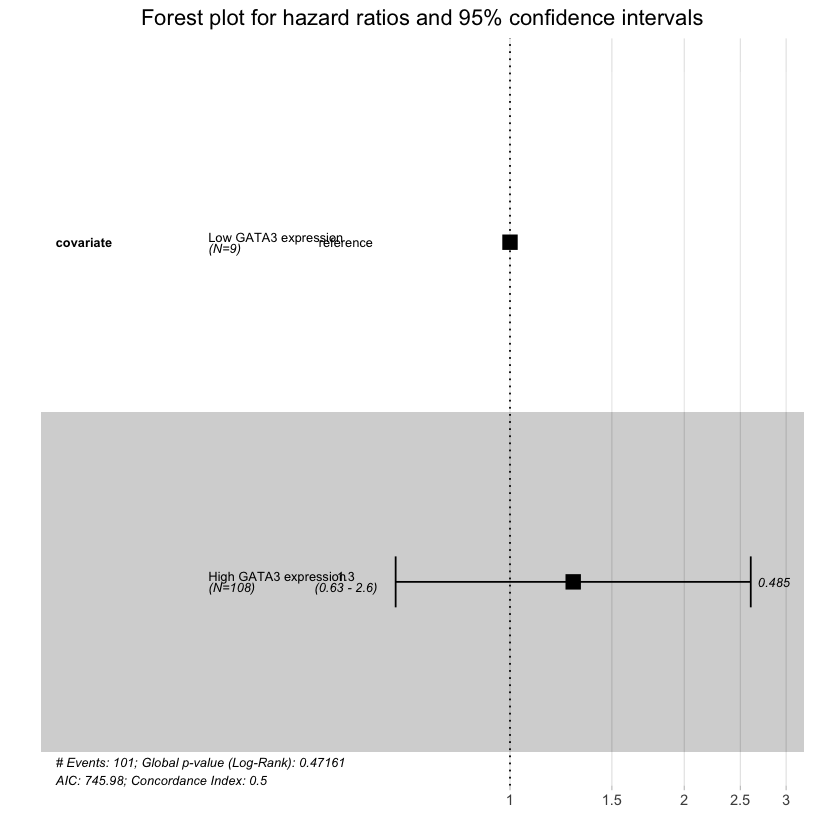

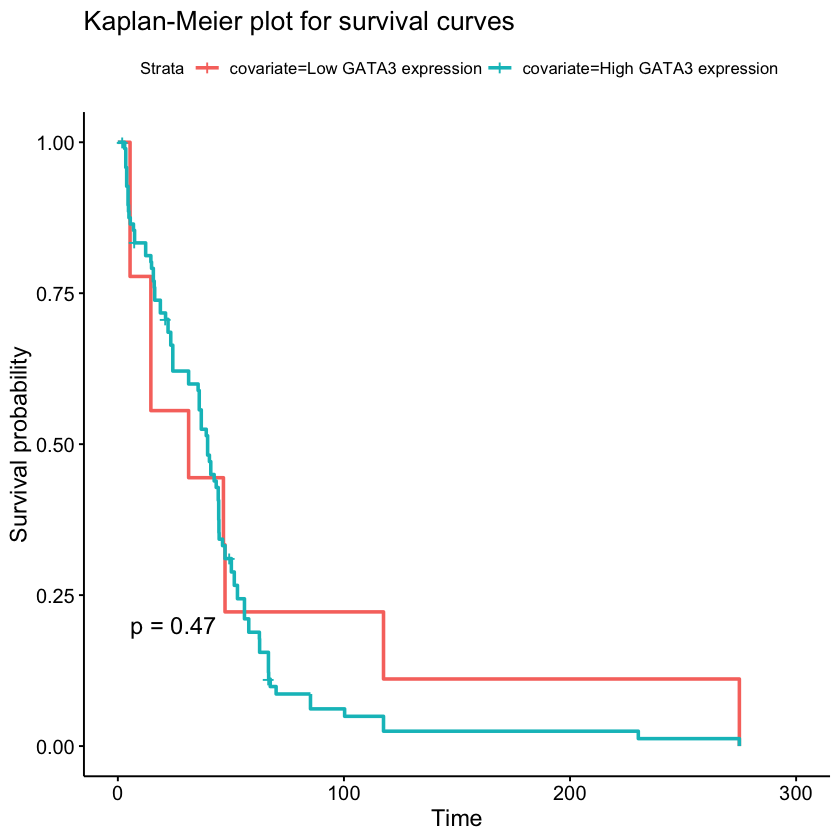

In [41]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_next, biomarker_level)

### Tumor grade progression at any biopsy

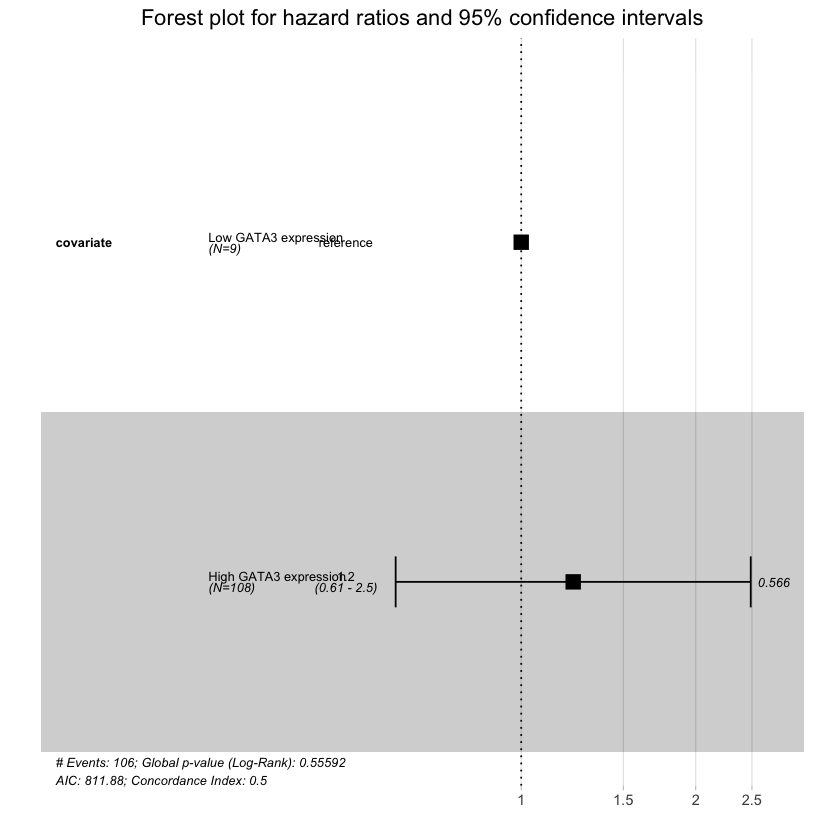

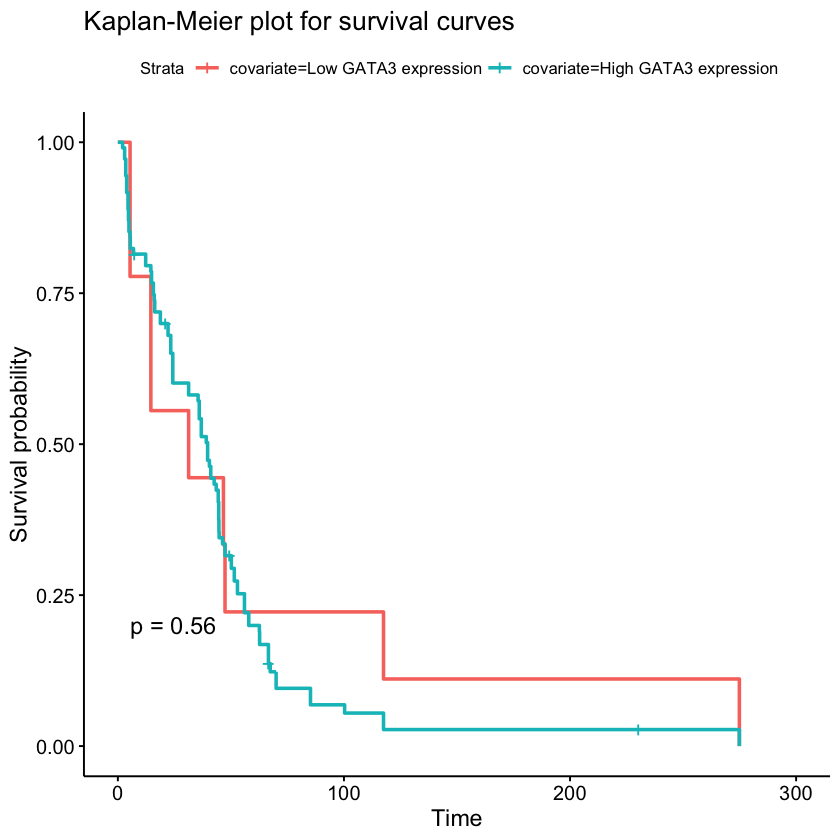

In [42]:
OUTCOME %>% summarize_surv(fu_mo, progression_grade_any, biomarker_level)

### Tumor stage progression at next biopsy

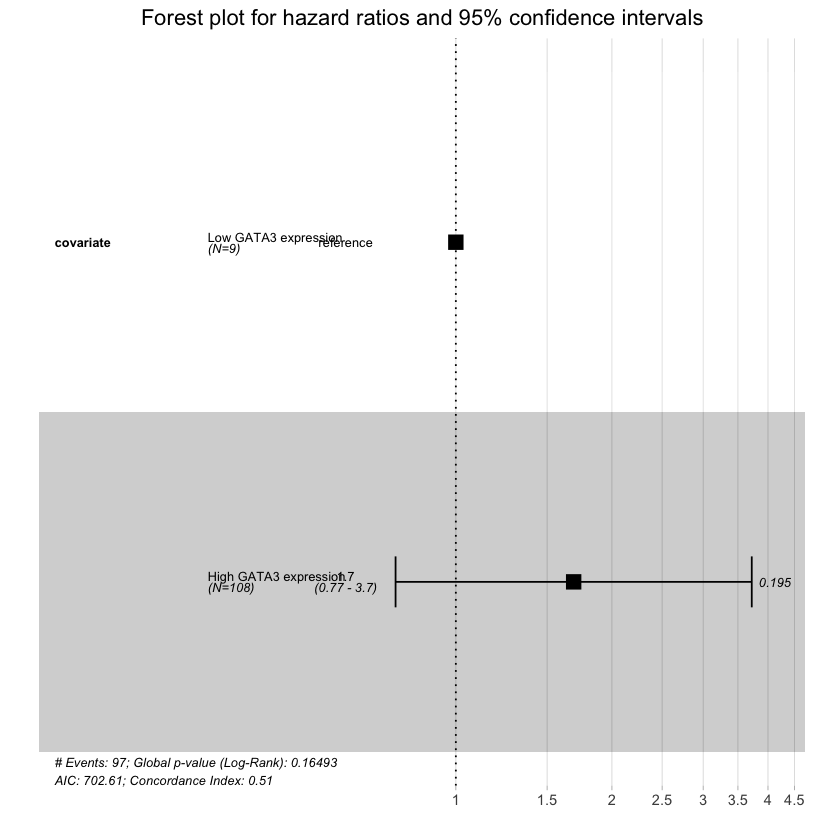

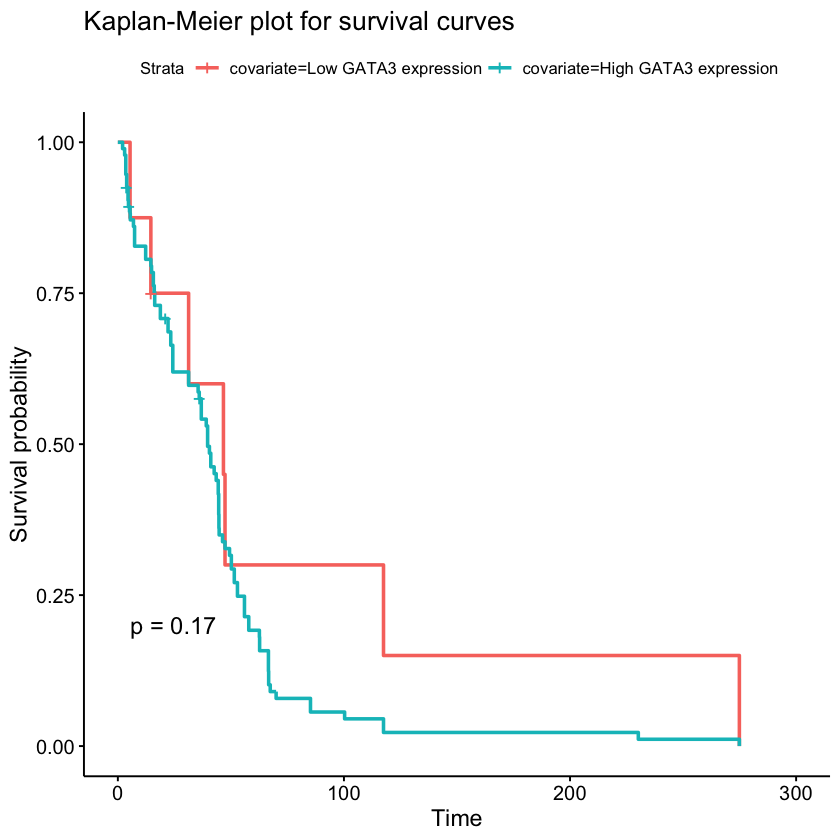

In [43]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_next, biomarker_level)

### Tumor stage progression at any biopsy

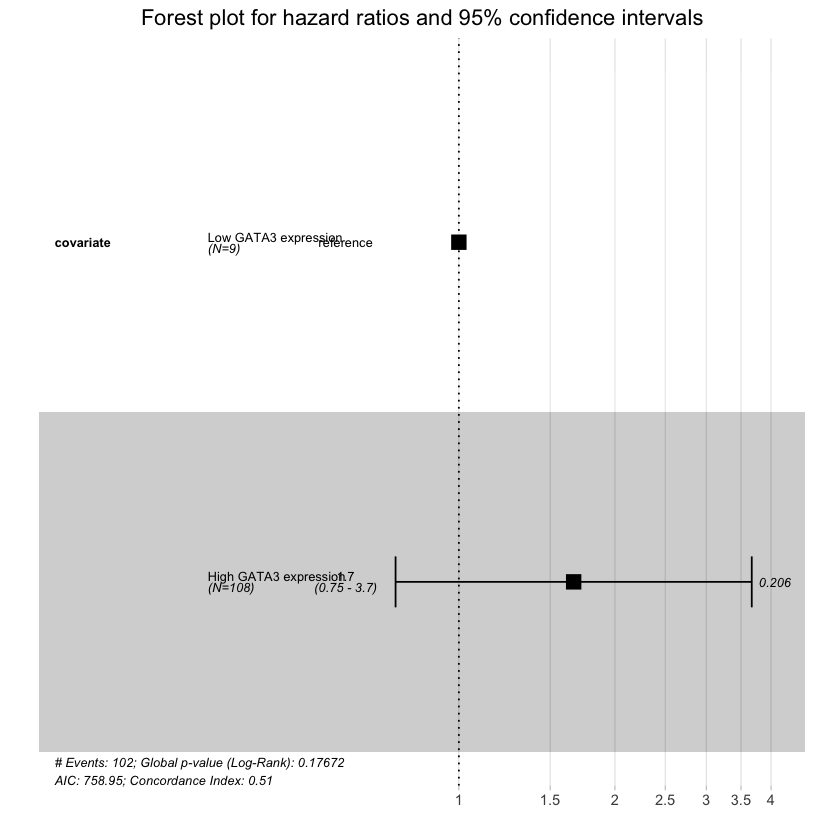

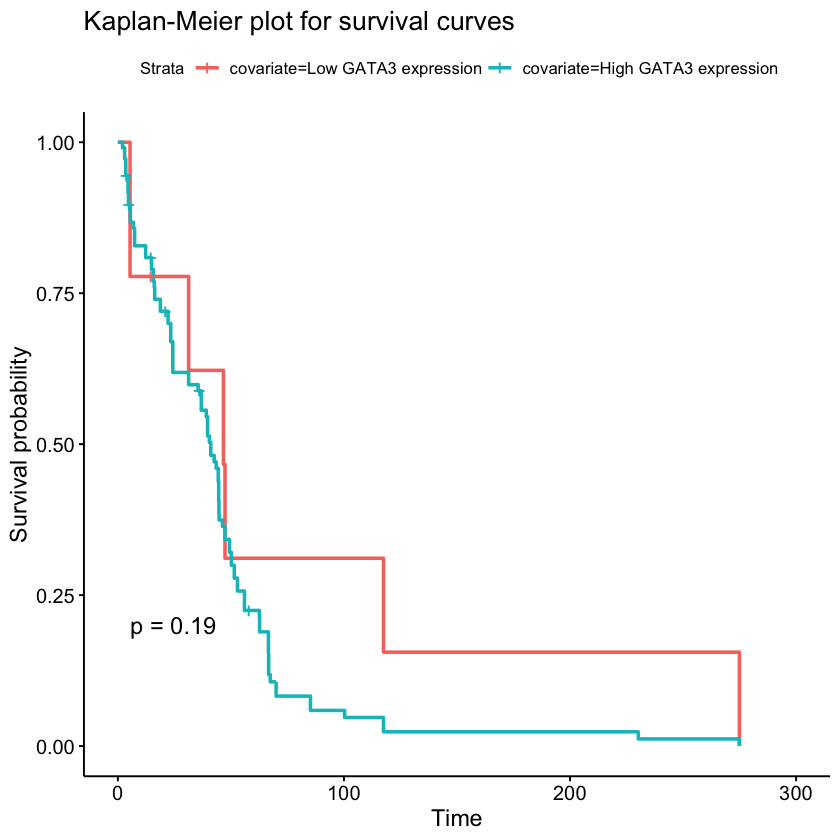

In [44]:
OUTCOME %>% summarize_surv(fu_mo, progression_stage_any, biomarker_level)